<a href="https://colab.research.google.com/github/Dhina000/Visualisation-and-Analysis-of-Earthquakes-from-1995---2023/blob/main/EQDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly
!pip install squarify


In [ ]:
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions
import plotly.express as px       ## data visualization & graphical plotting
import squarify                   ## Treemap plots

%matplotlib inline
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

pd.options.display.float_format = '{:.2f}'.format  ## limiting the decimals in the output to 2

import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

In [ ]:
## Load the dataset
df = pd.read_csv('earthquake_1995-2023.csv')

## Check a few records in the dataset that we just loaded
df.head(5)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.50,16-08-2023 12:47,7,4,green,0,657,us,114,7.18,25.00,mww,192.96,-13.88,167.16,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.50,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.68,40.00,mww,69.73,12.81,-88.13,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.60,17-07-2023 03:05,7,5,green,0,899,us,70,1.63,28.00,mww,171.37,-38.19,-70.37,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.20,16-07-2023 06:48,6,6,green,1,860,us,173,0.91,36.00,mww,32.57,54.38,-160.70,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.30,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.88,172.80,Mi,21.00,54.49,-160.80,Alaska Peninsula,NaN,NaN


In [ ]:
print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 1000
Number of features (columns) in the dataset are: 19
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 1622


In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
alert,551
location,6
continent,716
country,349


In [ ]:
print('--'*40)
print(df.info())
print('--'*40, '\n', df.describe(include='all').T)
print('--'*40)

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country 

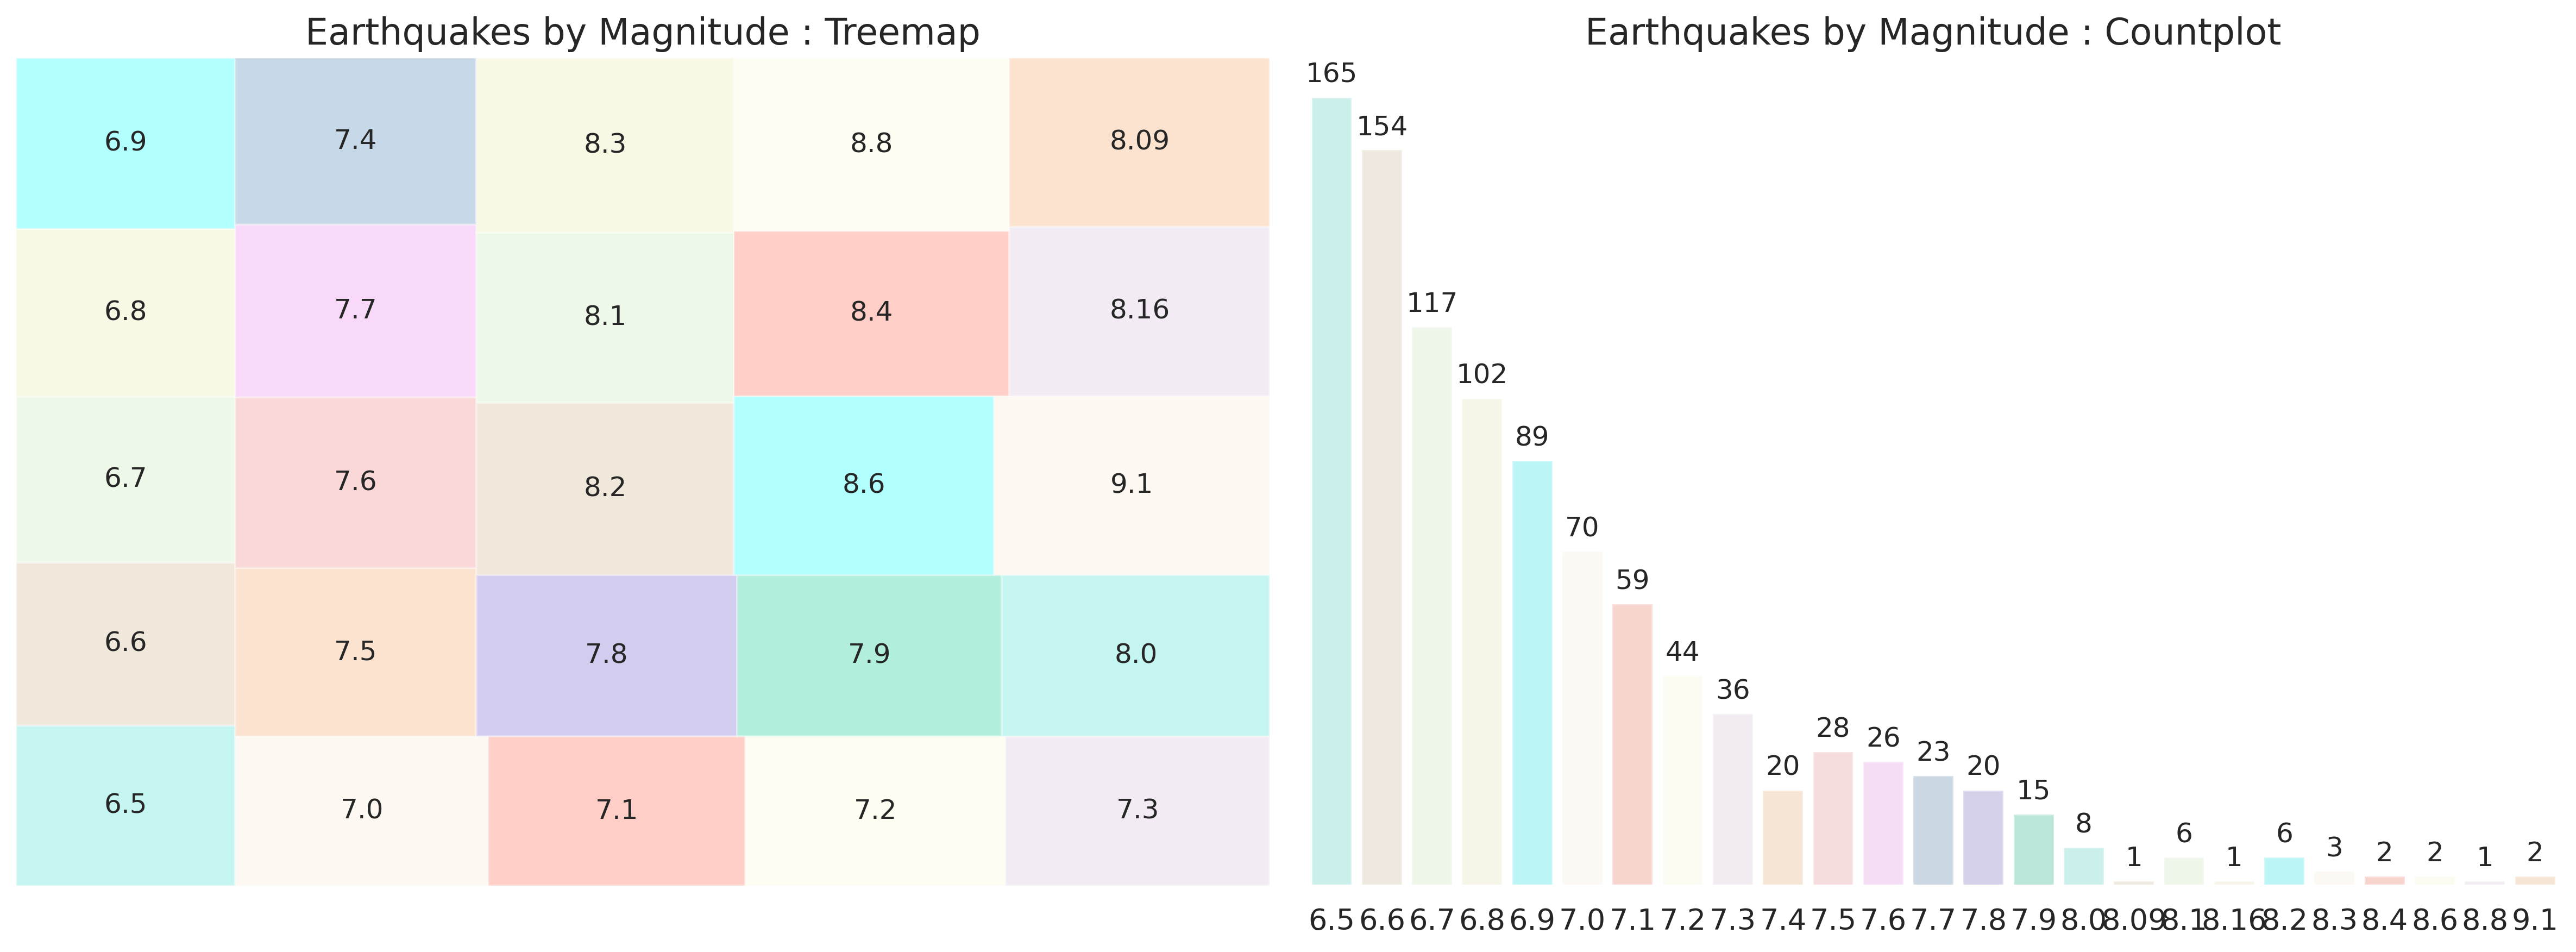

In [ ]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True, 'figure.dpi':300, 'savefig.dpi':300})
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')

plt.subplots(figsize=(16,6))

plt.subplot(1,2,1)

plt.title('Earthquakes by Magnitude : Treemap',fontsize=16)
labels = df['magnitude'].value_counts().index.get_level_values(0).tolist()
sizes = df['magnitude'].value_counts().reset_index().magnitude.values.tolist()

squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=0.3)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Earthquakes by Magnitude : Countplot', fontsize=16)
ax = sns.countplot(x='magnitude', data=df, palette=my_col, alpha=0.3)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 2), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.show()

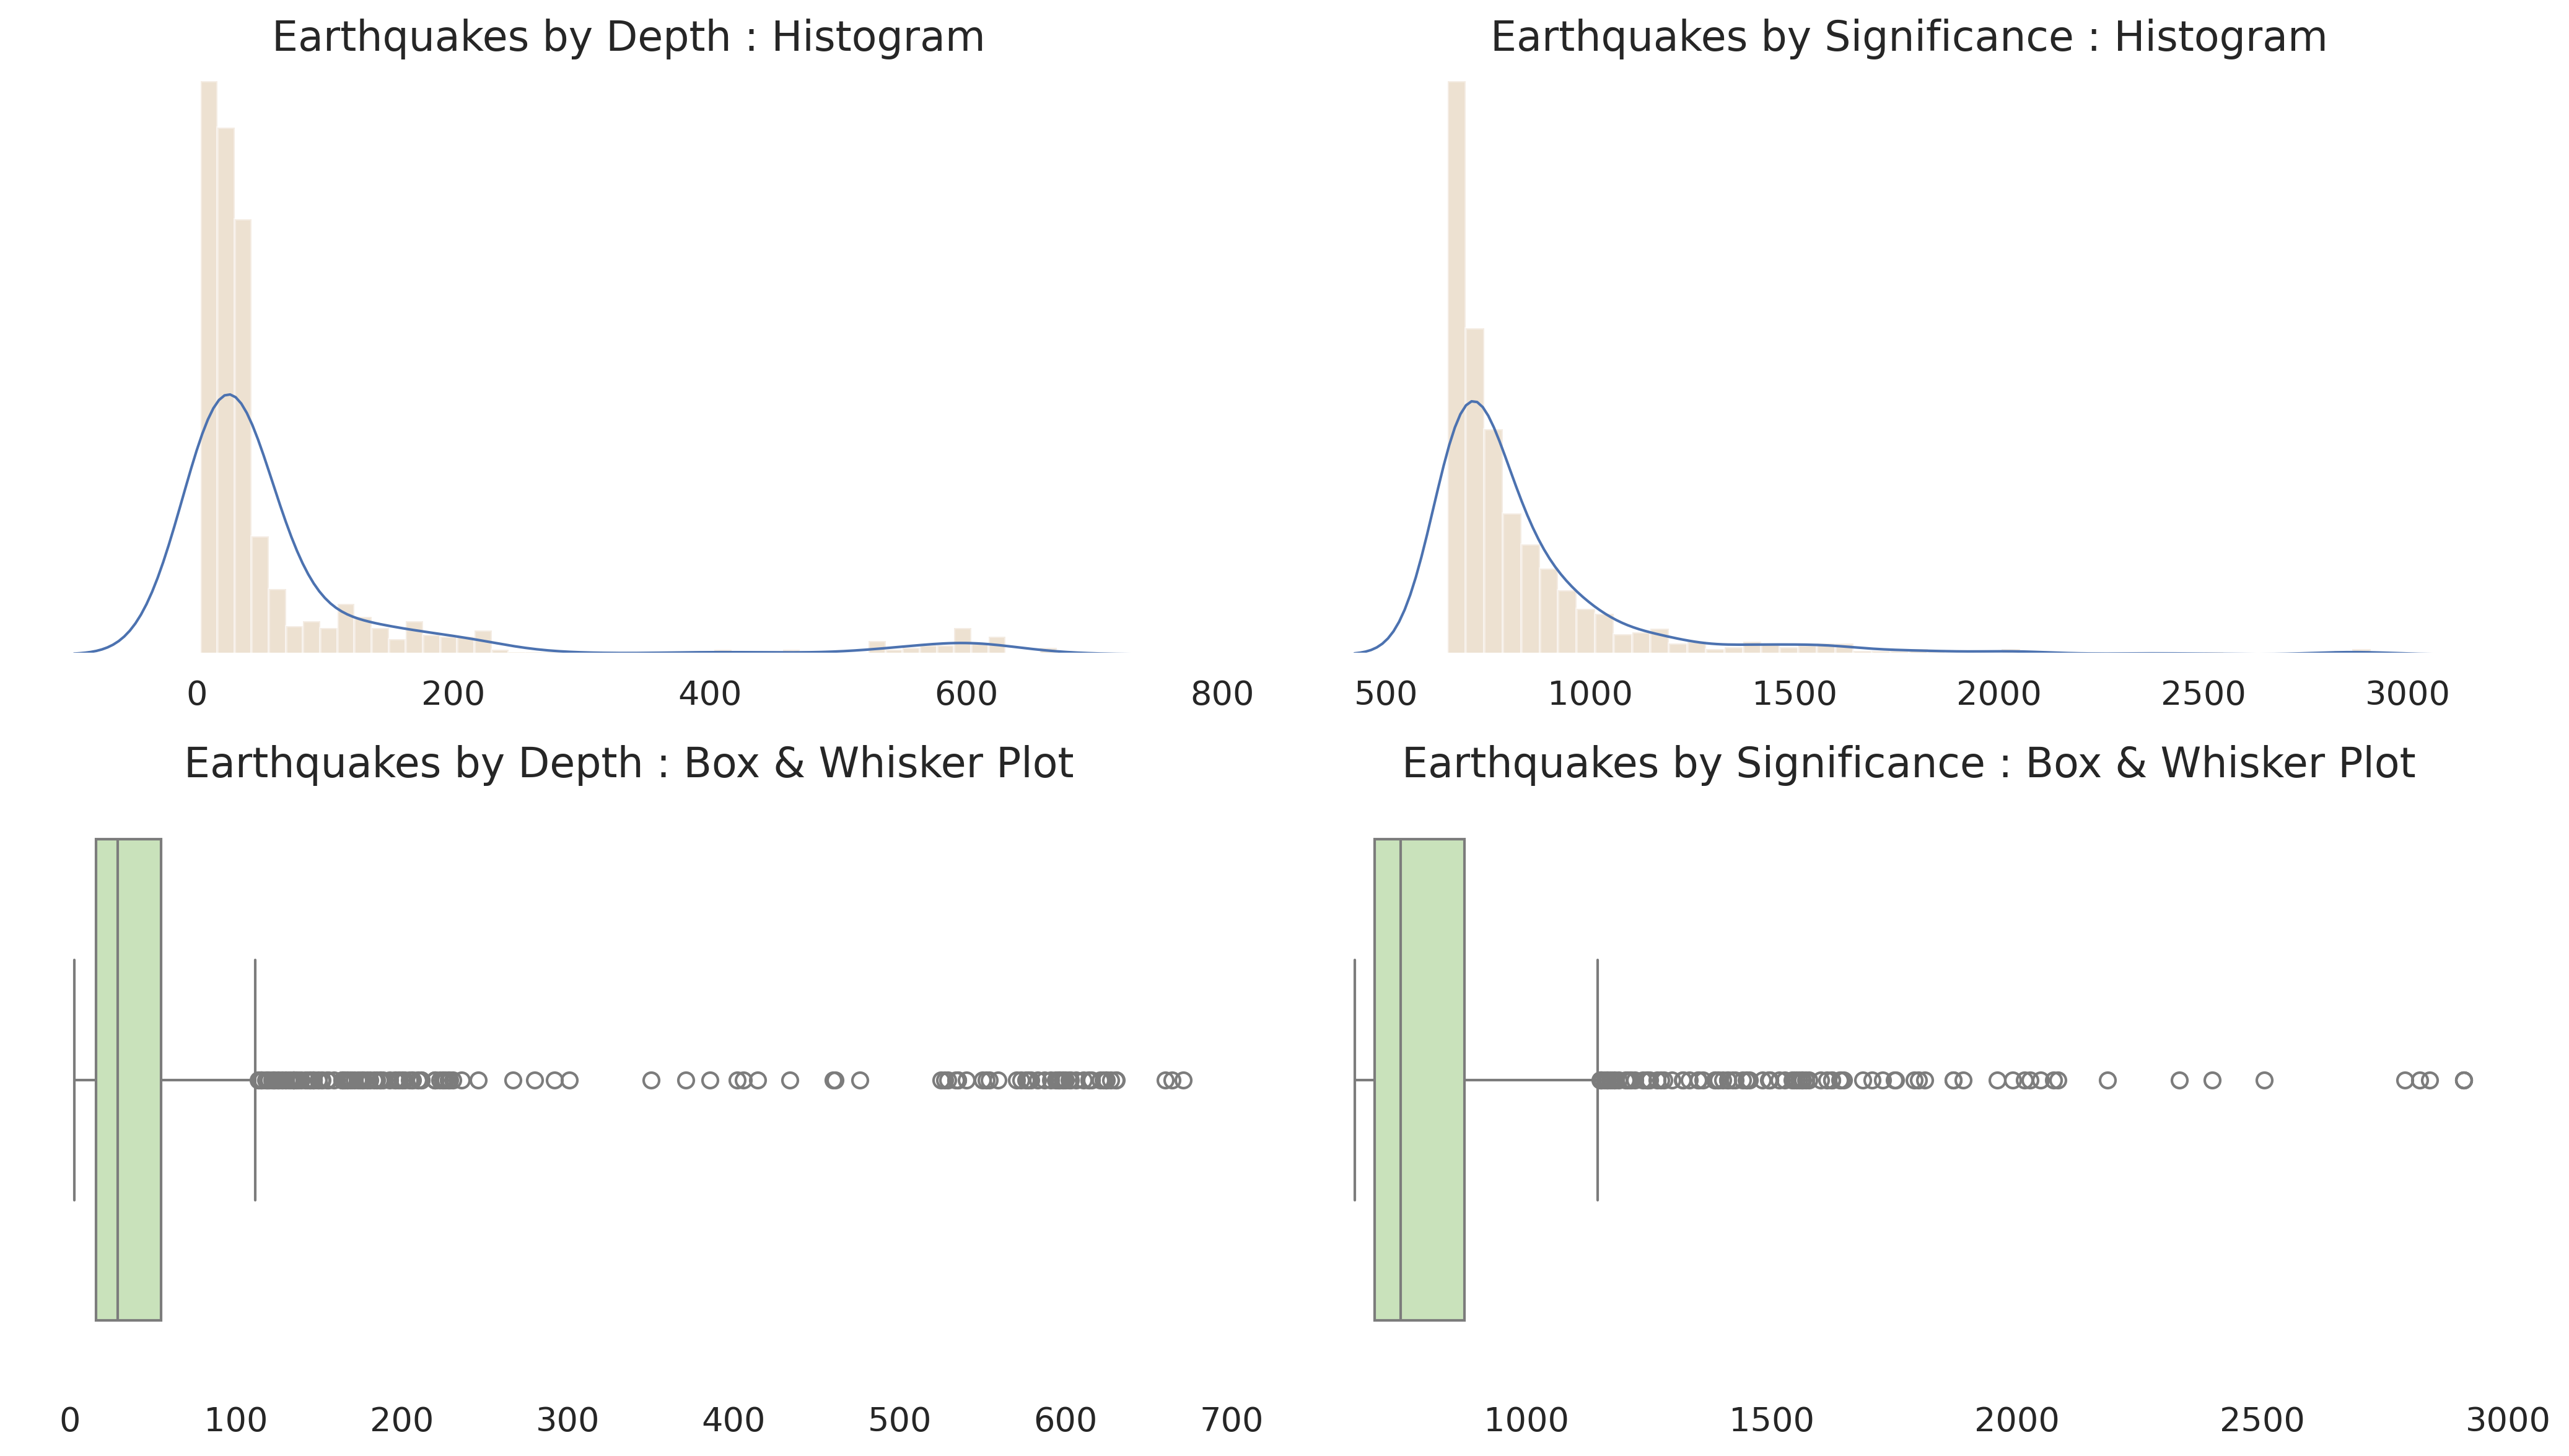

In [ ]:
plt.subplots(figsize=(14,8))

plt.subplot(2,2,1)
plt.title('Earthquakes by Depth : Histogram', pad=1, fontsize=16)
sns.distplot(df['depth'], color="#D2B48C", kde_kws={'linewidth':1,'color':'b'})
plt.yticks([]), plt.ylabel(None), plt.xlabel(None)

plt.subplot(2,2,2)
plt.title('Earthquakes by Significance : Histogram', pad=1, fontsize=16)
sns.distplot(df['sig'], color="#D2B48C", kde_kws={'linewidth':1,'color':'b'})
plt.yticks([]), plt.ylabel(None), plt.xlabel(None)

plt.subplot(2,2,3)
plt.title('Earthquakes by Depth : Box & Whisker Plot', pad=1, fontsize=16)
sns.boxplot(df['depth'], color="#c7e9b4", orient='h')
plt.ylabel(None), plt.xlabel(None), plt.yticks([])

plt.subplot(2,2,4)
plt.title('Earthquakes by Significance : Box & Whisker Plot', pad=1, fontsize=16)
sns.boxplot(df['sig'], color="#c7e9b4", orient='h')
plt.ylabel(None), plt.xlabel(None), plt.yticks([])

plt.show()


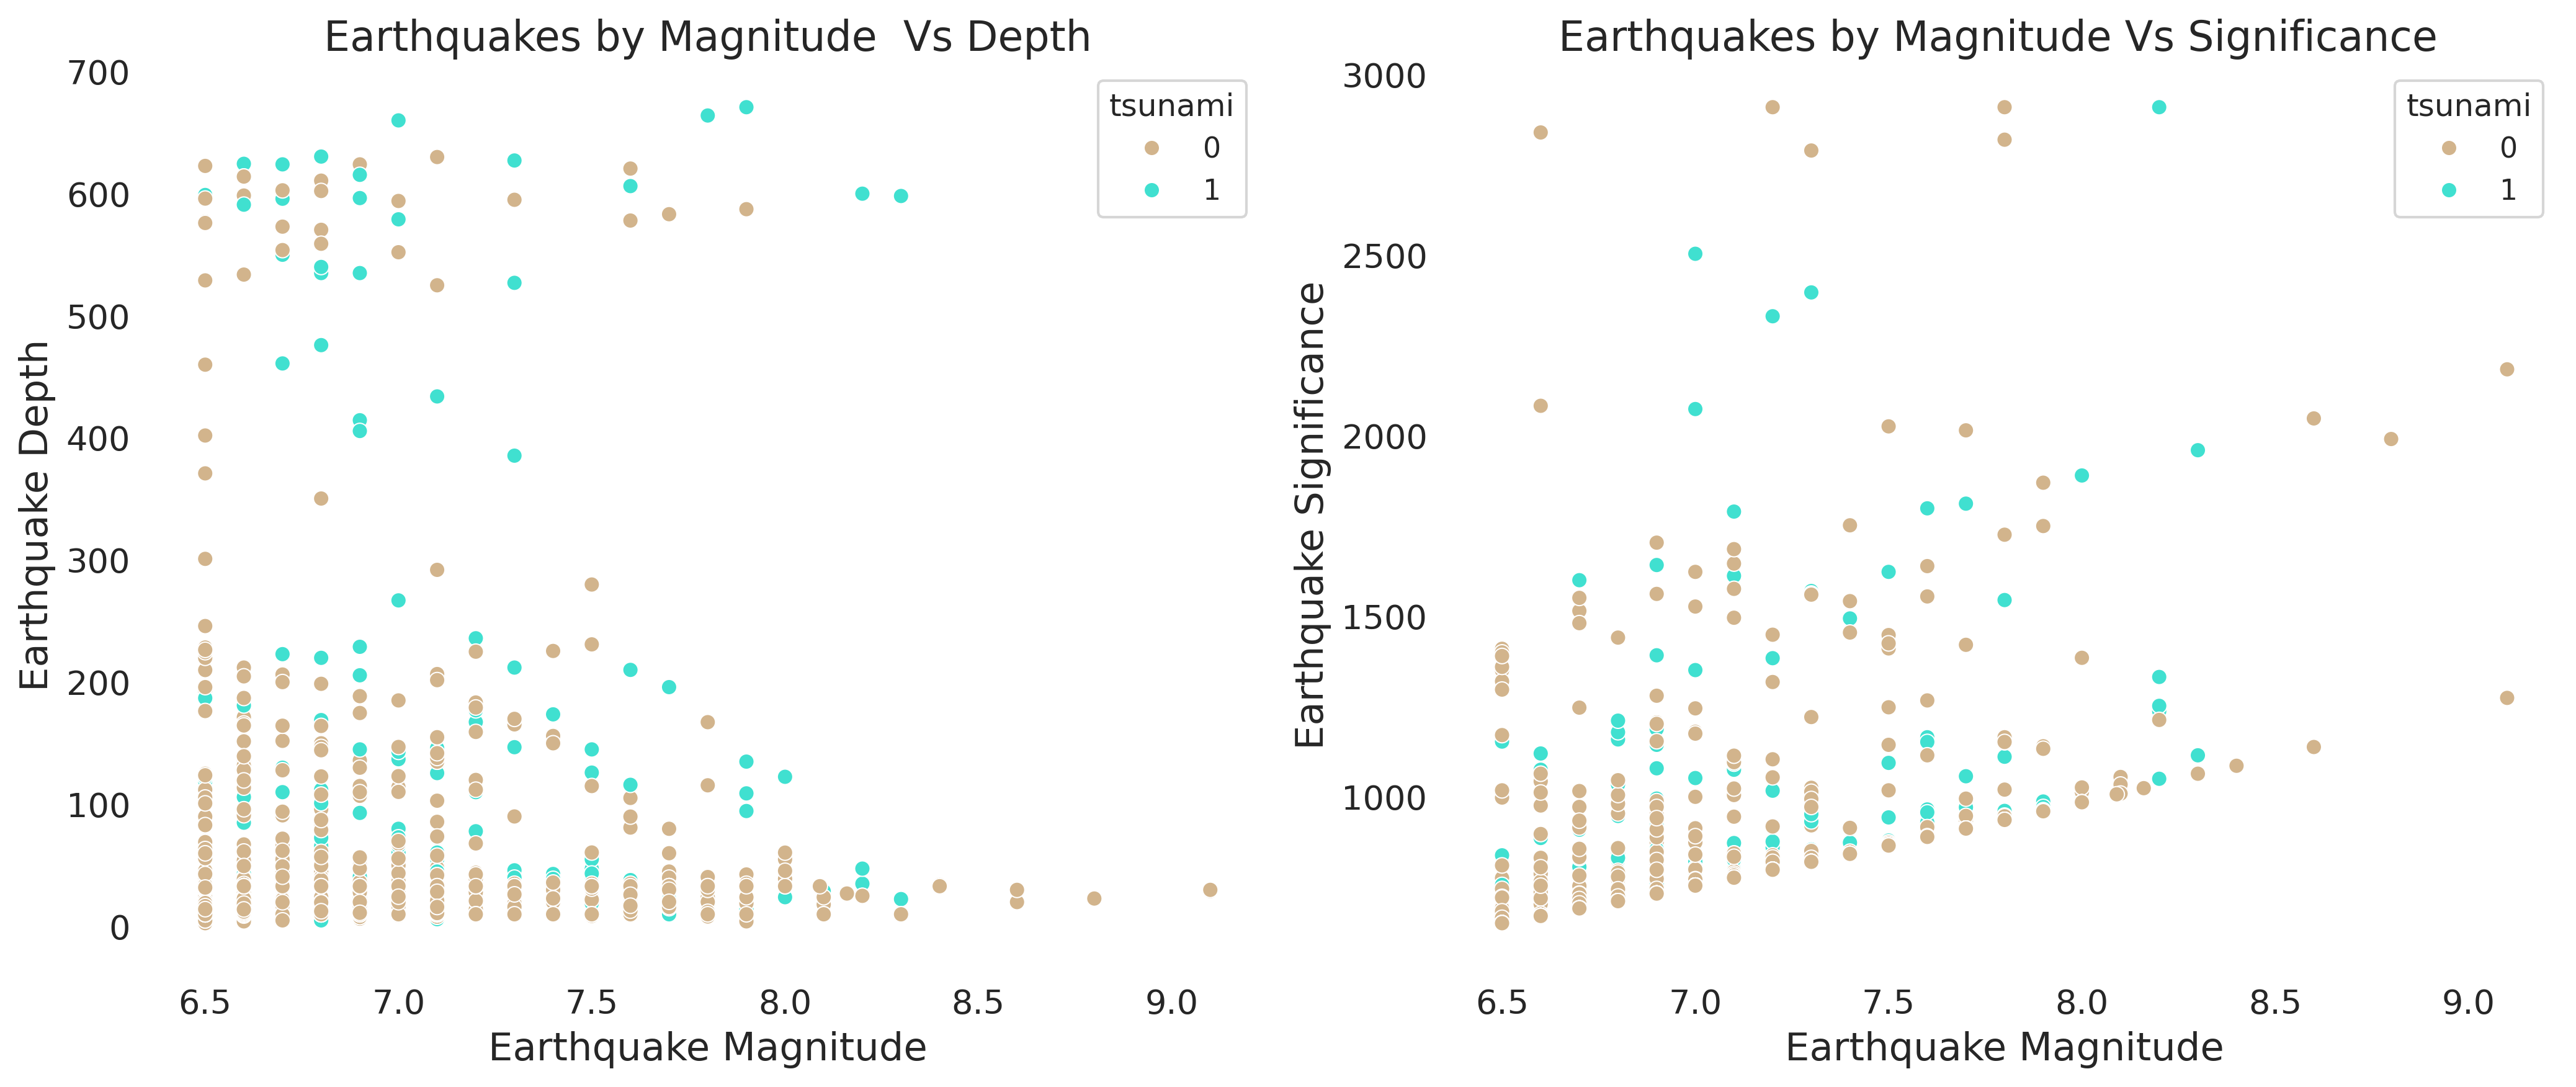

In [ ]:
plt.subplots(figsize=(14,6))
my_pal = ('#D2B48C','#40E0D0')

plt.subplot(1,2,1)
plt.title('Earthquakes by Magnitude  Vs Depth',fontsize=16)
sns.scatterplot(data=df, x='magnitude', y='depth', hue='tsunami', palette=my_pal)
plt.ylabel('Earthquake Depth', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.subplot(1,2,2)
plt.title('Earthquakes by Magnitude Vs Significance ',fontsize=16)
sns.scatterplot(data=df, x='magnitude', y='sig', hue='tsunami', palette=my_pal)
plt.ylabel('Earthquake Significance', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.show()

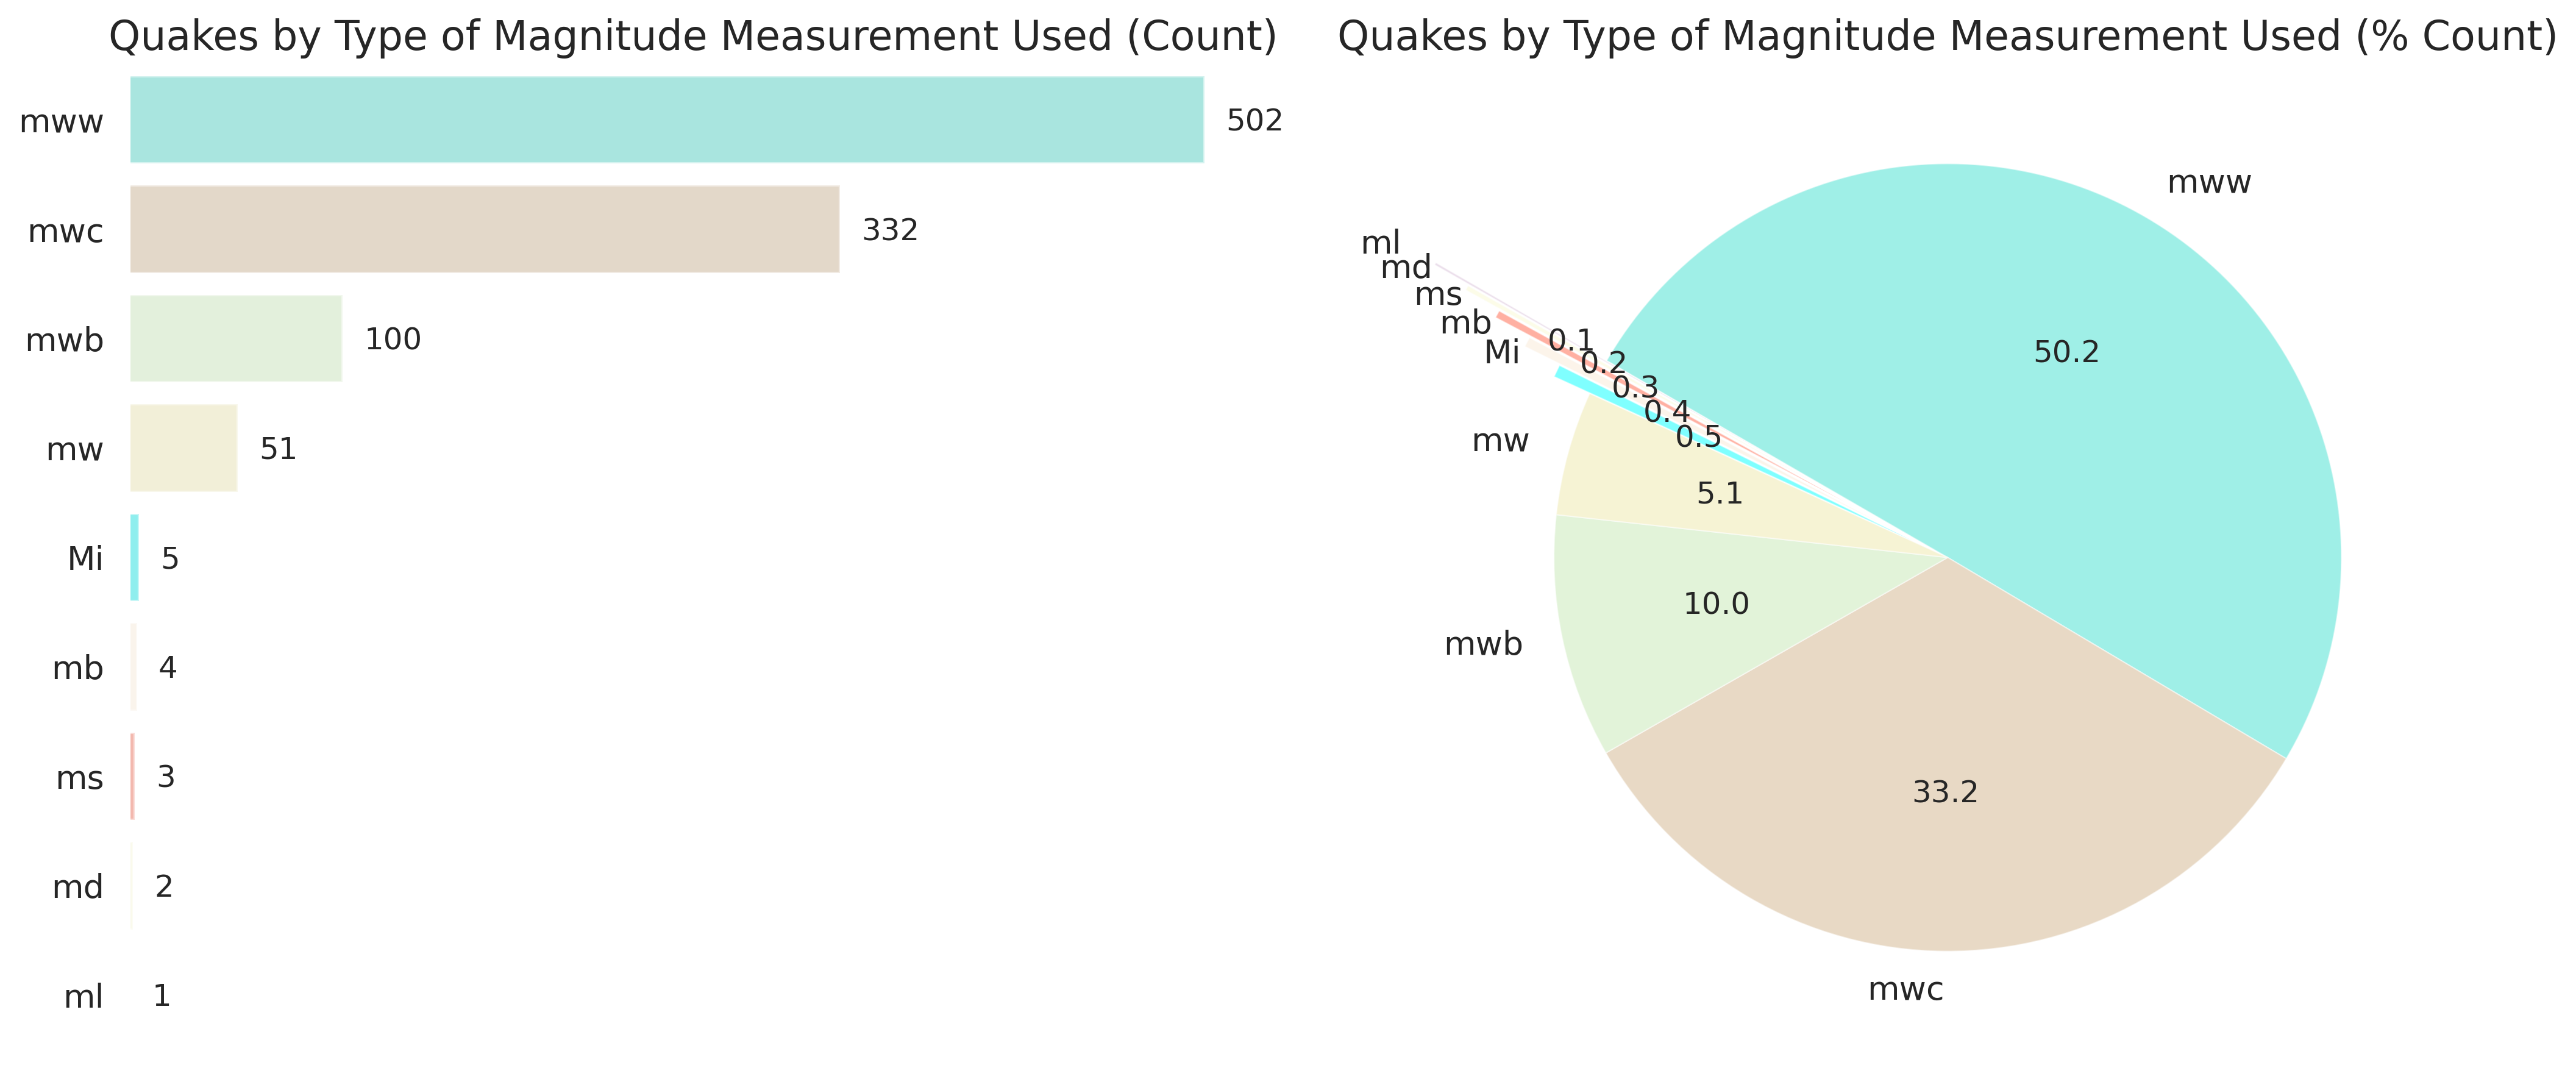

In [ ]:
plt.subplots(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Quakes by Type of Magnitude Measurement Used (Count)', fontsize=16)
ax = sns.countplot(y='magType', data=df, palette=my_col, alpha=0.5, order=df['magType'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 10, p.get_y()+0.5))
plt.ylabel(None), plt.xlabel(None), plt.xticks([])

plt.subplot(1,2,2)
plt.title('Quakes by Type of Magnitude Measurement Used (% Count)',fontsize=16)
my_xpl = [0.0, 0.0, 0.0, 0.0, 0.1, 0.20, 0.30, 0.40, 0.50]
df['magType'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.5, 'edgecolor' : 'white','linewidth': 0.5, 'antialiased': True}, autopct='%1.1f')

plt.show()

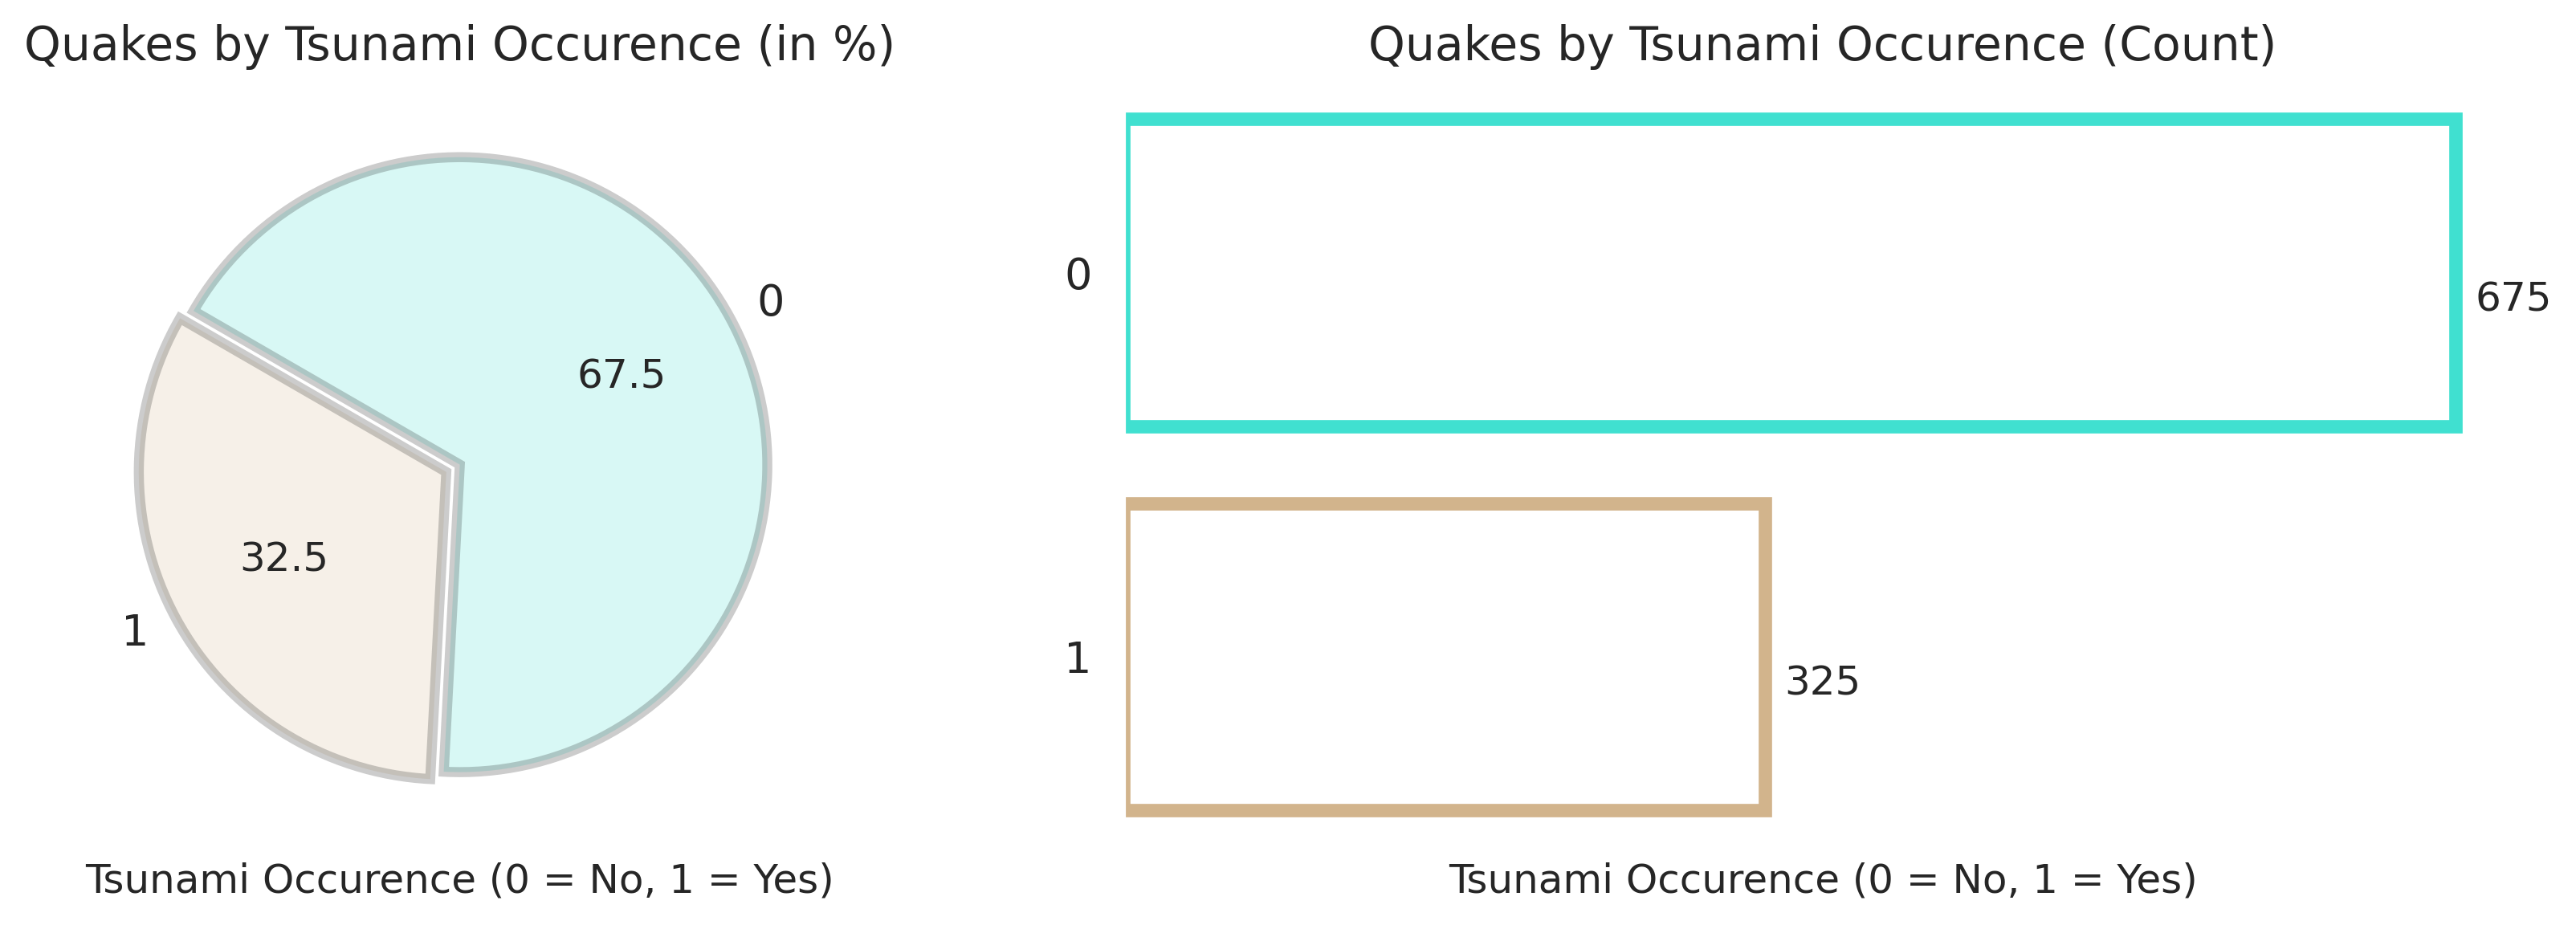

In [ ]:
plt.subplots(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Quakes by Tsunami Occurence (in %)',fontsize=14)
my_xpl = [0.0, 0.05]
df['tsunami'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.2, 'edgecolor' : 'black','linewidth': 3, 'antialiased': True}, autopct='%1.1f')
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)',fontsize=12)

plt.subplot(1,2,2)
plt.title('Quakes by Tsunami Occurence (Count)',fontsize=14)
ax = sns.countplot(y='tsunami', data=df, facecolor=(1,1,1,1), linewidth=4, edgecolor=sns.color_palette(my_col, 2), order=df['tsunami'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 10, p.get_y()+0.5))

plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)',fontsize=12)
plt.xticks([]), plt.ylabel(None)

plt.show()


In [ ]:

df_r = df['location'].str.split(pat=',', n=1, expand=True)
print(df_r.head(5))                       ## View the new dataframe

## fill the missing country data, with country names in country column of df_r (df_r[1] is the country column)

df['country'] = df['country'].fillna(df_r[1])
print('\n', 'Missing values in the refined country column are : ', df['country'].isna().sum())

                  0             1
0              Sola       Vanuatu
1          Intipucá   El Salvador
2          Loncopué     Argentina
3        Sand Point        Alaska
4  Alaska Peninsula          None

 Missing values in the refined country column are :  54


In [ ]:
df_country=df.dropna(subset=['country','location','continent'], how='all')
print('\n', 'Missing values in the country column are : ', df_country['country'].isnull().sum())


 Missing values in the country column are :  51


In [ ]:
print('\n', 'Missing location values Before : ', df_country['location'].isnull().sum())
df_country['location']=df_country['location'].fillna('unknown')
print('\n', 'Missing location values After  : ', df_country['location'].isnull().sum())


 Missing location values Before :  3

 Missing location values After  :  0


In [ ]:
df_country['country'] = df_country['country'].fillna(df_country['location'])

## Check the null values in country column

df_country['country'].isnull().sum()

0

In [ ]:
df_country['country'].unique()

array(['Vanuatu', ' El Salvador', 'Argentina', ' Alaska',
       'Alaska Peninsula', ' Antigua and Barbuda', 'Tonga',
       'the Fiji Islands', 'Colombia', 'the Loyalty Islands', ' Tonga',
       'Indonesia', ' New Zealand', 'Russian Federation (the)',
       'Papua New Guinea', 'Afghanistan', 'Ecuador',
       'Kermadec Islands region', ' Vanuatu', 'Tajikistan', 'Turkiye',
       'Solomon Islands', ' Indonesia', 'Fiji', 'Panama', 'Mexico',
       'Taiwan', "People's Republic of China", 'the Kermadec Islands',
       'Philippines', 'Brazil', 'Peru', ' Nicaragua', ' New Caledonia',
       ' Japan', ' Cyprus', 'United States of America', 'Vanuatu region',
       'Antarctica', 'South Sandwich Islands region', 'Haiti',
       ' Philippines', ' Panama', ' Wallis and Futuna',
       'Mauritius - Reunion region', 'Japan', ' Russia', 'Mongolia',
       ' Chile', 'Greece', 'central Mid-Atlantic Ridge', 'Chile',
       ' Solomon Islands', ' Greece', 'Russia', ' Jamaica', 'Turkey',
       ' Fiji

In [ ]:
df_country = df_country.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## Next we refine some country names

df_country.replace({'country': {"the Fiji Islands" : "Fiji region", "Fiji" : "Fiji region",
                                "the Kermadec Islands" : "New Zealand region", "the Loyalty Islands" : "New Caledonia",
                                "Vanuatu" : "Vanuatu region", "South Sandwich Islands" : "South Sandwich Islands region",
                                "South Georgia and the South Sandwich Islands" : "South Sandwich Islands region",
                                "Prince Edward Islands region" : "Canada", "Okhotsk" : "Russia region",
                                "off the west coast of northern Sumatra" : "Indonesia",
                                "Philippine Islands region" : "Philippines",
                                "the Kuril Islands" : "Kuril Islands",
                                "United Kingdom of Great Britain and Northern Ireland (the)": "UK",
                                "People's Republic of China": "CHINA", "United States of America": "USA",
                                "Alaska": "USA", "Aleutian Islands, Alaska" : "USA", "California" : "USA",
                                "India" : "India region", "Russia" : "Russia region", "New Zealand" : "New Zealand region",
                                "Japan region" : "Japan"}}, inplace=True)

df_country['country'].unique()

array(['Vanuatu region', 'El Salvador', 'Argentina', 'USA',
       'Alaska Peninsula', 'Antigua and Barbuda', 'Tonga', 'Fiji region',
       'Colombia', 'New Caledonia', 'Indonesia', 'New Zealand region',
       'Russian Federation (the)', 'Papua New Guinea', 'Afghanistan',
       'Ecuador', 'Kermadec Islands region', 'Tajikistan', 'Turkiye',
       'Solomon Islands', 'Panama', 'Mexico', 'Taiwan', 'CHINA',
       'Philippines', 'Brazil', 'Peru', 'Nicaragua', 'Japan', 'Cyprus',
       'Antarctica', 'South Sandwich Islands region', 'Haiti',
       'Wallis and Futuna', 'Mauritius - Reunion region', 'Russia region',
       'Mongolia', 'Chile', 'Greece', 'central Mid-Atlantic Ridge',
       'Jamaica', 'Turkey', 'UK', 'Australia', 'Canada',
       'Svalbard and Jan Mayen', 'Venezuela', 'Bolivia', 'Honduras',
       'Bouvet Island region', 'Costa Rica', 'Iran', 'Guatemala',
       'Botswana', 'Italy', 'Myanmar', 'Northern Mariana Islands',
       'India region', 'Barbados', 'Nepal', 'Guam', '

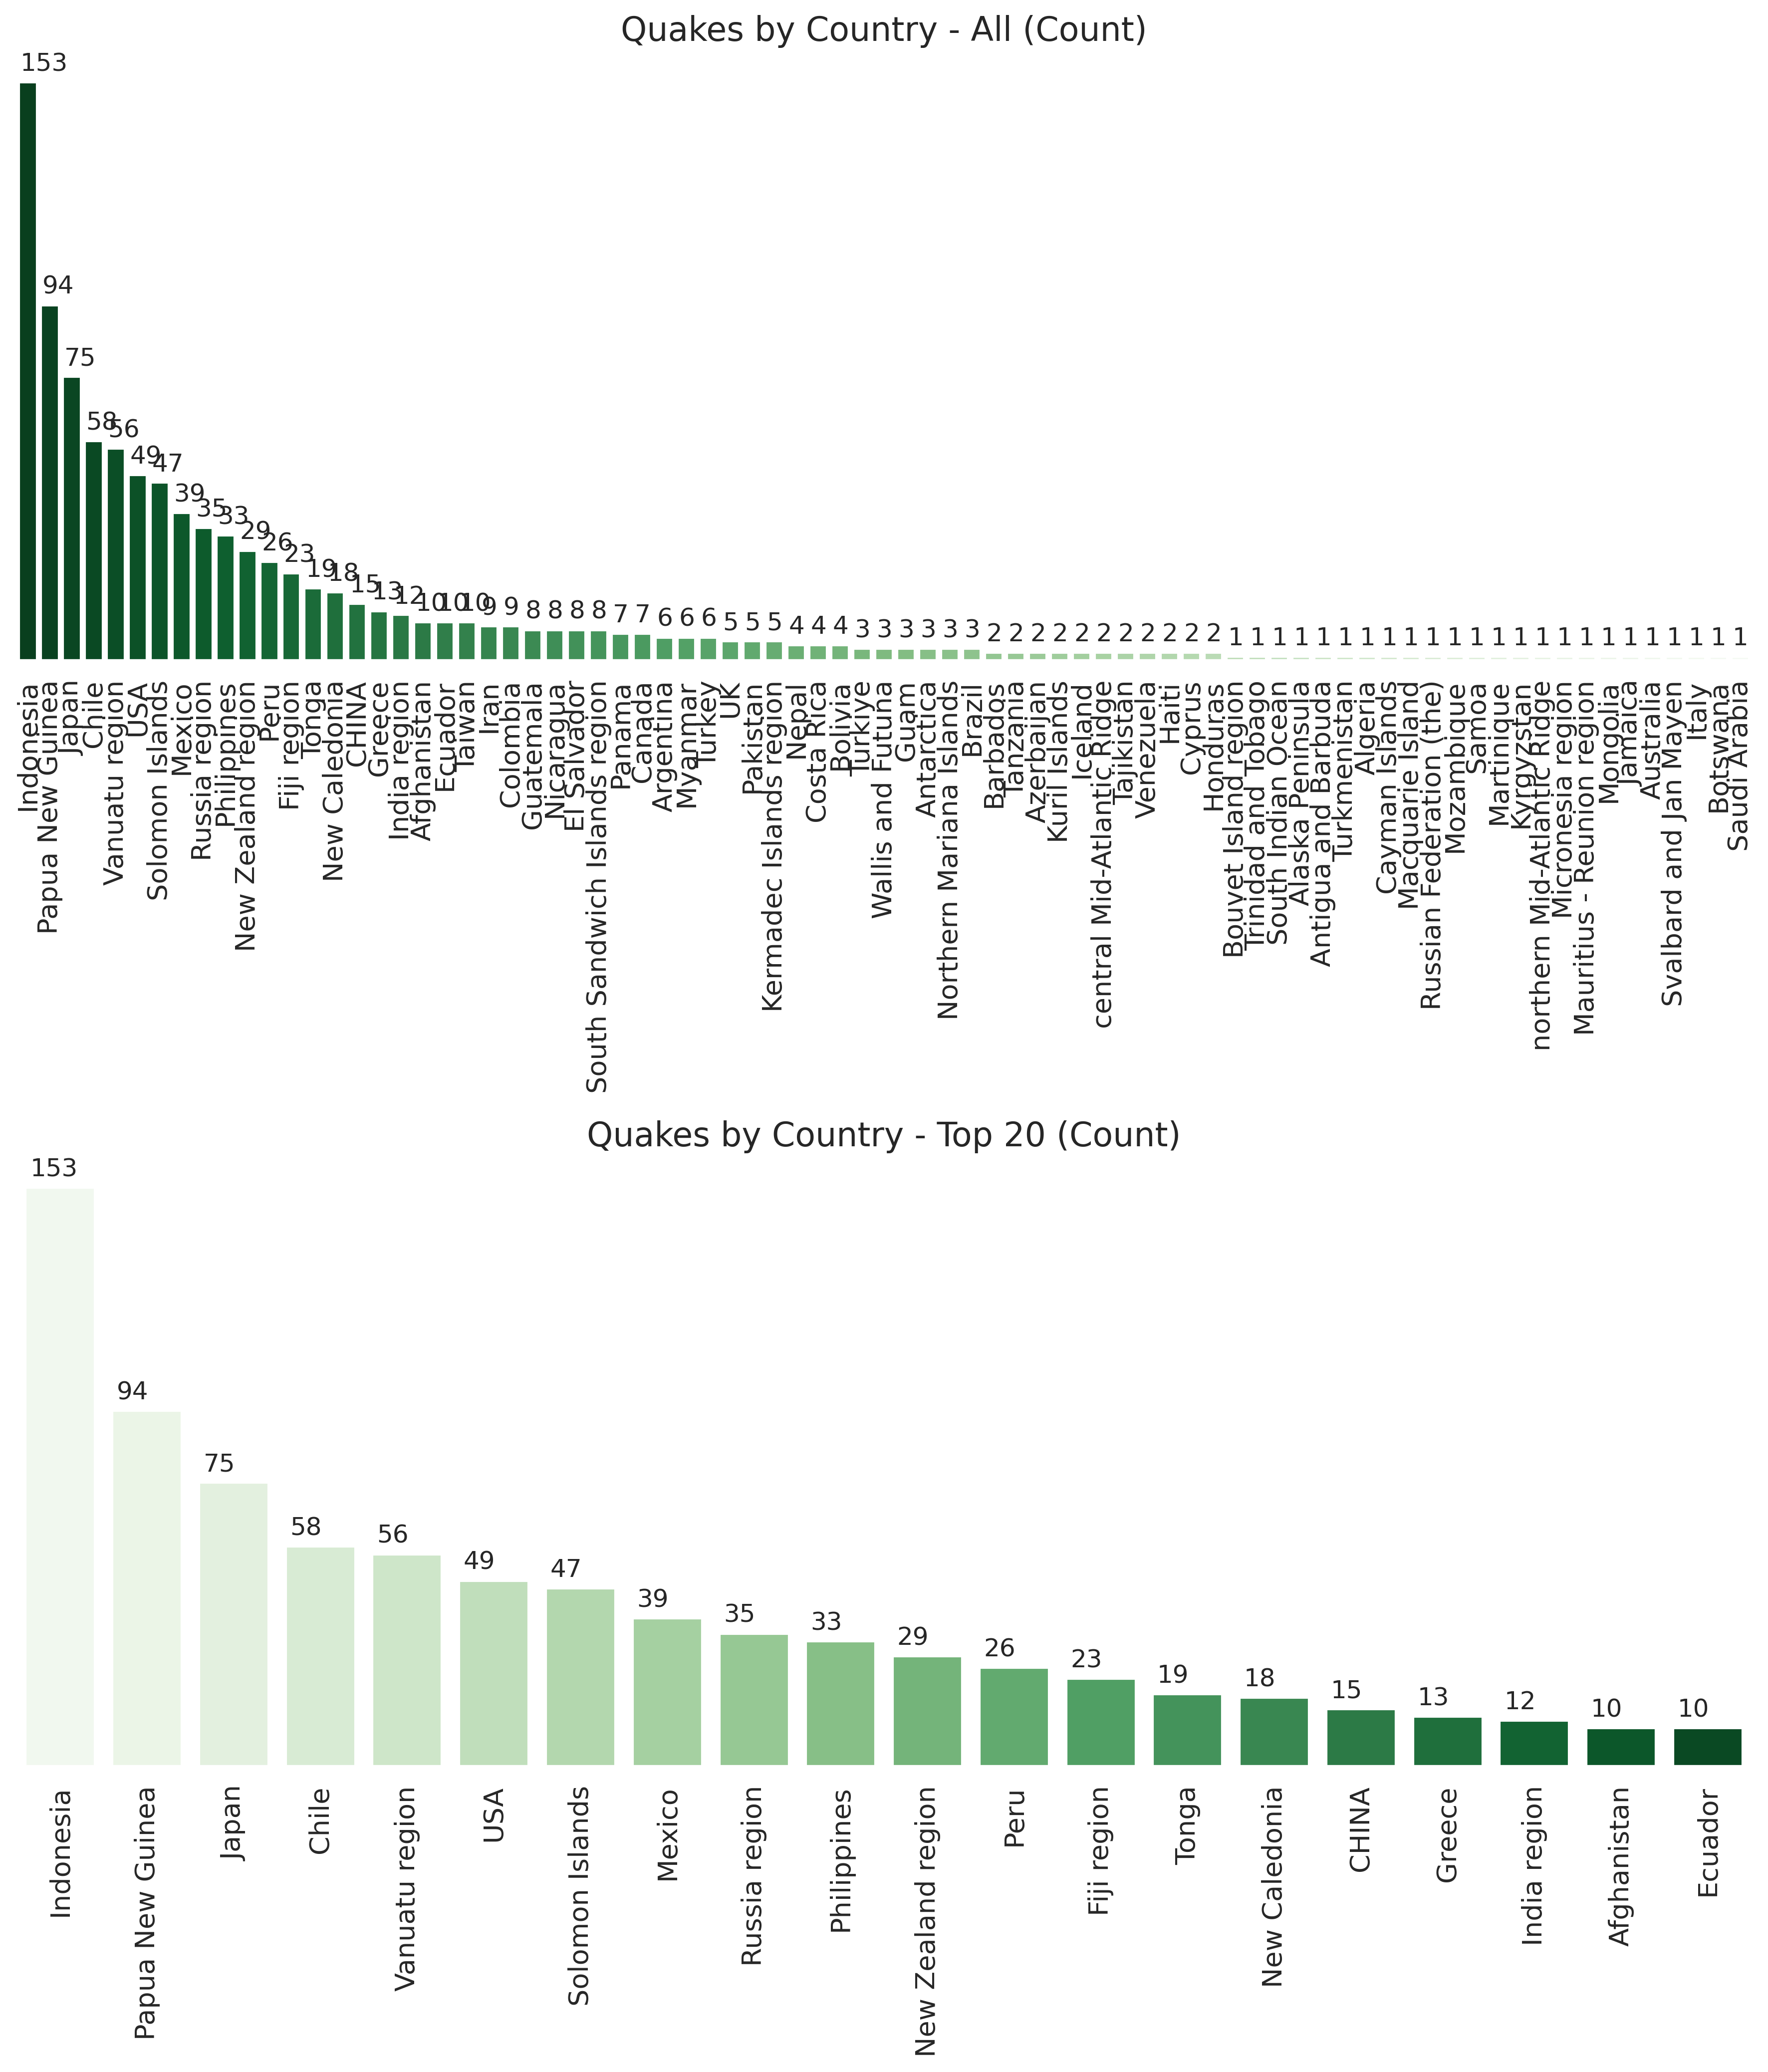

In [ ]:
plt.subplots(figsize=(12,14))

plt.subplot(211)
plt.title('Quakes by Country - All (Count)', fontsize=16)
ax = sns.countplot(x=df_country['country'], palette='Greens_r', alpha=1, order=df_country['country'].value_counts().index)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(212)
plt.title('Quakes by Country - Top 20 (Count)', fontsize=16)
ax = sns.countplot(x=df_country['country'], palette='Greens', alpha=1, order=df_country['country'].value_counts().head(20).index)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()

In [ ]:
!pip install folium
import folium
from folium import plugins

In [ ]:
print("Earthquakes in Indonesia  -  Heat Map")
heat_map = df[["latitude", "longitude"]].values
Indonesia = folium.Map(location=[0, 105], zoom_start=4)
Indonesia.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
Indonesia

Earthquakes in Indonesia  -  Heat Map


In [ ]:
print("Earthquakes Across the World  -  Heat Map")
world = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=1)
heat_map = df[["latitude", "longitude"]].values
world.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=13))
world

Earthquakes Across the World  -  Heat Map


In [ ]:
data = pd.read_csv('earthquake_data.csv')
data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.00,22-11-2022 02:03,8,7,green,1,768,us,117,0.51,17.00,mww,14.00,-9.80,159.60,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.90,18-11-2022 13:37,4,4,green,0,735,us,99,2.23,34.00,mww,25.00,-4.96,100.74,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.00,12-11-2022 07:09,3,3,green,1,755,us,147,3.12,18.00,mww,579.00,-20.05,-178.35,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.30,11-11-2022 10:48,5,5,green,1,833,us,149,1.86,21.00,mww,37.00,-19.29,-172.13,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.60,09-11-2022 10:14,0,2,green,1,670,us,131,5.00,27.00,mww,624.46,-25.59,178.28,NaN,NaN,NaN


In [ ]:
alerts = data["alert"].unique()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
magnitude,782.00,6.94,0.45,6.50,6.60,6.80,7.10,9.10
cdi,782.00,4.33,3.17,0.00,0.00,5.00,7.00,9.00
mmi,782.00,5.96,1.46,1.00,5.00,6.00,7.00,9.00
tsunami,782.00,0.39,0.49,0.00,0.00,0.00,1.00,1.00
sig,782.00,870.11,322.47,650.00,691.00,754.00,909.75,2910.00
nst,782.00,230.25,250.19,0.00,0.00,140.00,445.00,934.00
dmin,782.00,1.33,2.22,0.00,0.00,0.00,1.86,17.65
gap,782.00,25.04,24.23,0.00,14.62,20.00,30.00,239.00
depth,782.00,75.88,137.28,2.70,14.00,26.30,49.75,670.81
latitude,782.00,3.54,27.30,-61.85,-14.60,-2.57,24.65,71.63


In [ ]:
data.isnull().sum()

,0
title,0
magnitude,0
date_time,0
cdi,0
mmi,0
alert,367
tsunami,0
sig,0
net,0
nst,0


In [ ]:
features = ["magnitude", "depth", "cdi", "mmi", "sig"]
target = "alert"
data = data[features + [target]]
data.head(10)

,magnitude,depth,cdi,mmi,sig,alert
0,7.00,14.00,8,7,768,green
1,6.90,25.00,4,4,735,green
2,7.00,579.00,3,3,755,green
3,7.30,37.00,5,5,833,green
4,6.60,624.46,0,2,670,green
5,7.00,660.00,4,3,755,green
6,6.80,630.38,1,3,711,green
7,6.70,20.00,7,6,797,green
8,6.80,20.00,8,7,1179,yellow
9,7.60,26.94,9,8,1799,yellow


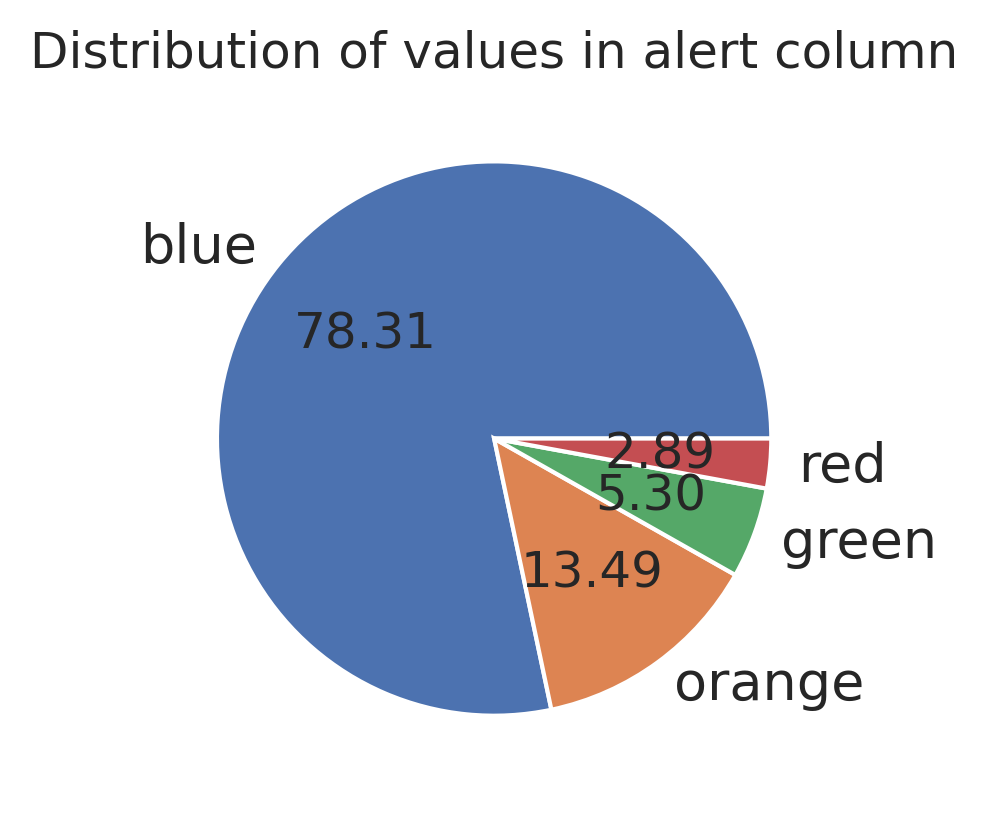

In [ ]:
plt.figure(figsize = (3,3))
plt.pie(x = data[target].value_counts(), labels = ['blue','orange','green','red'], autopct = '%.2f')
plt.title("Distribution of values in alert column")
plt.show()

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 0 to 507
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  415 non-null    float64
 1   depth      415 non-null    float64
 2   cdi        415 non-null    int64  
 3   mmi        415 non-null    int64  
 4   sig        415 non-null    int64  
 5   alert      415 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 22.7+ KB


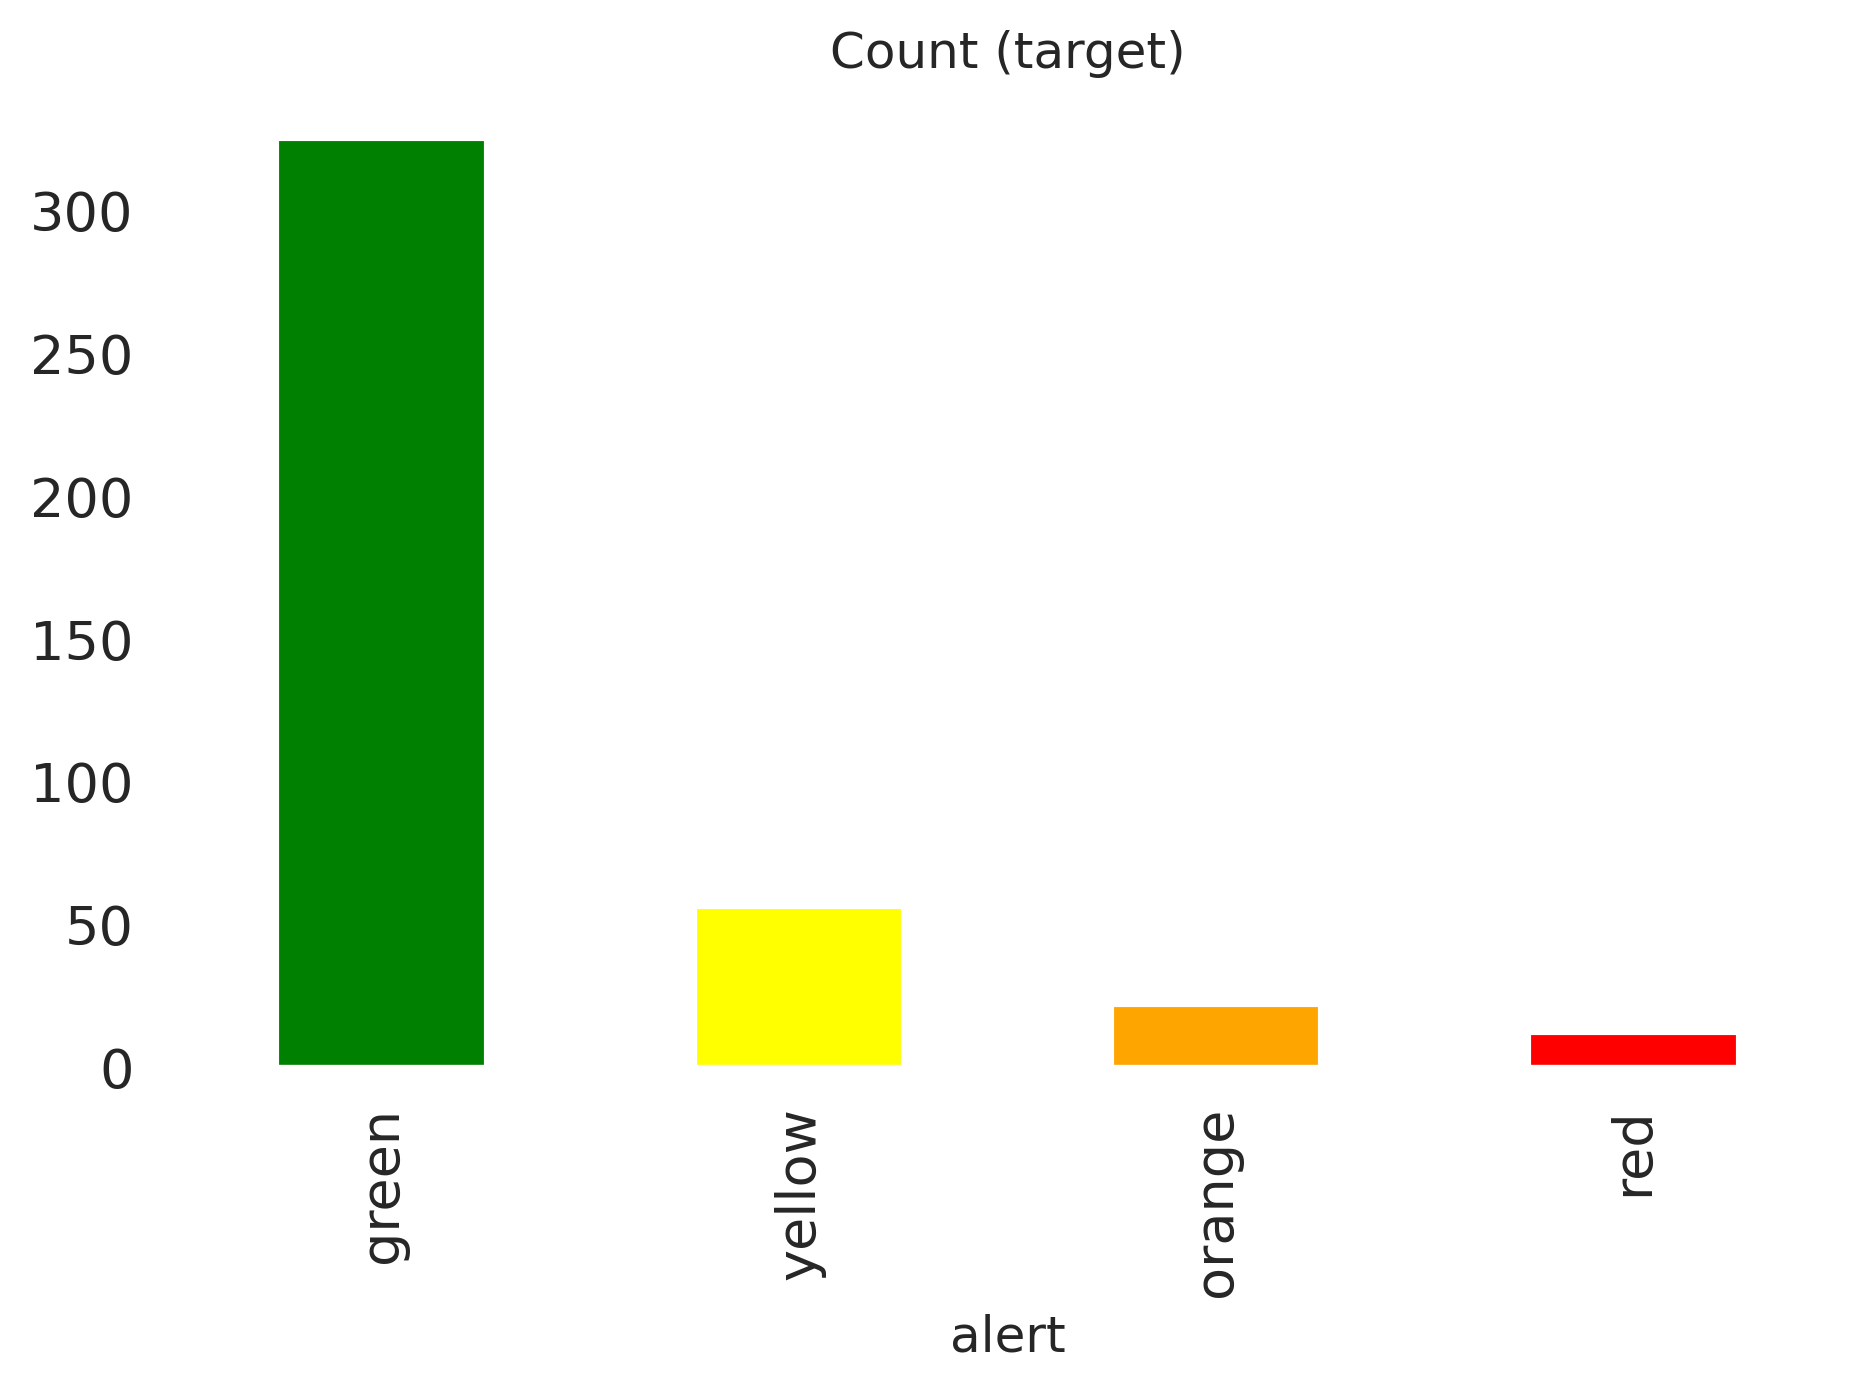

In [ ]:
data[target].value_counts().plot(kind='bar', title='Count (target)', color=['green', 'yellow', 'orange', 'red']);

In [ ]:
from imblearn.over_sampling import SMOTE

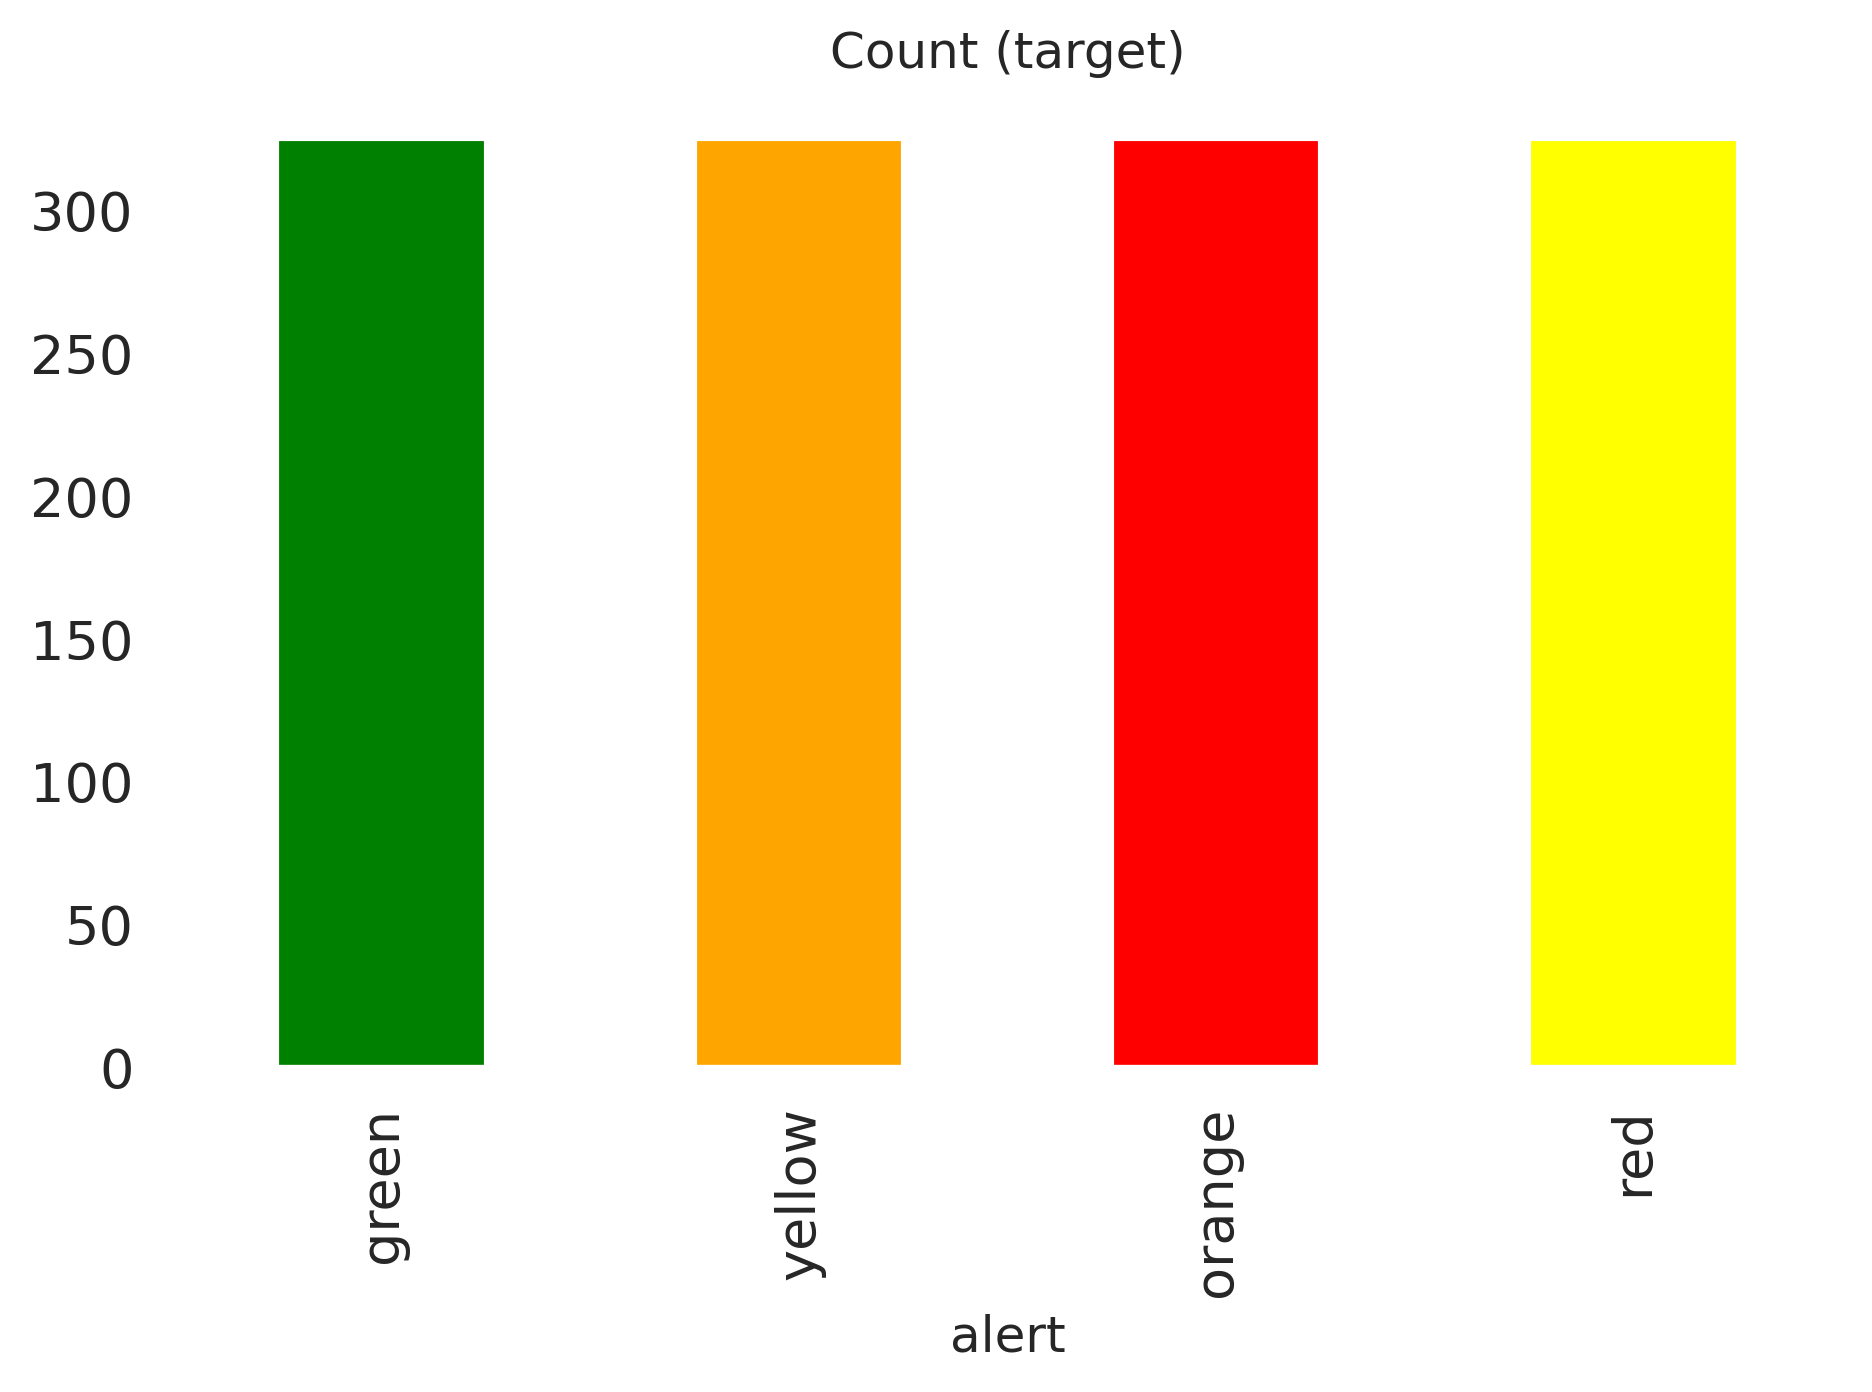

In [ ]:
X = data[features]
y = data[target]

X = X.loc[:,~X.columns.duplicated()]

sm = SMOTE(random_state=42)
X_res, y_res= sm.fit_resample(X, y,)

y_res.value_counts().plot(kind='bar', title='Count (target)', color=['green', 'orange', 'red', 'yellow']);

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score

96.15384615384616
              precision    recall  f1-score   support

       green       0.93      0.95      0.94        66
      orange       0.97      1.00      0.99        71
         red       1.00      1.00      1.00        64
      yellow       0.95      0.88      0.91        59

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260



[]

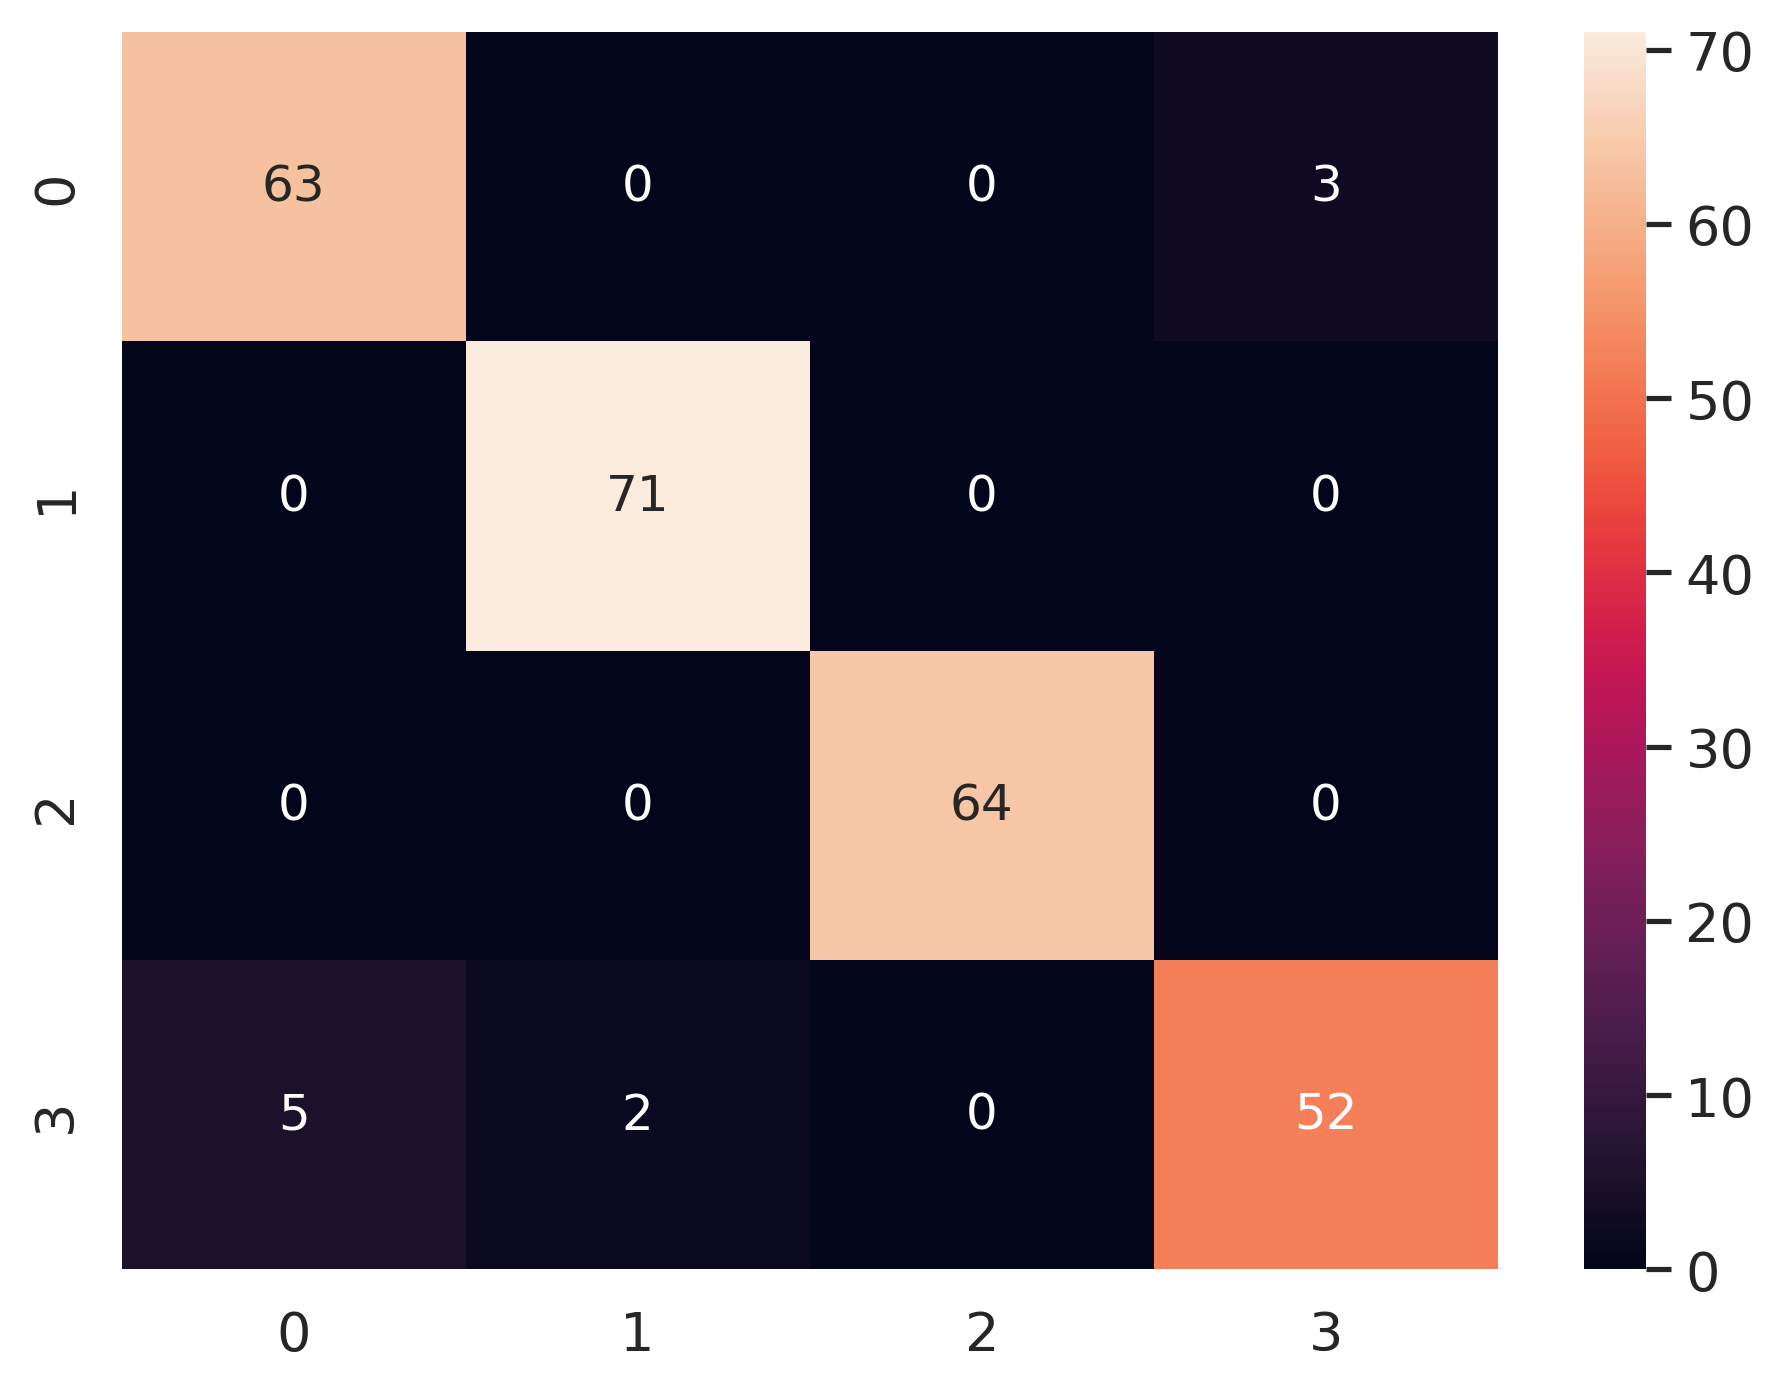

In [ ]:
dt_pred = dt.predict(X_test)
print(accuracy_score(dt_pred,y_test)*100)
print(classification_report(dt_pred, y_test))
sns.heatmap(confusion_matrix(dt_pred, y_test), annot = True)
plt.plot()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

91.15384615384615
              precision    recall  f1-score   support

       green       0.84      0.97      0.90        59
      orange       0.97      0.90      0.93        79
         red       1.00      0.98      0.99        65
      yellow       0.82      0.79      0.80        57

    accuracy                           0.91       260
   macro avg       0.91      0.91      0.91       260
weighted avg       0.92      0.91      0.91       260



[]

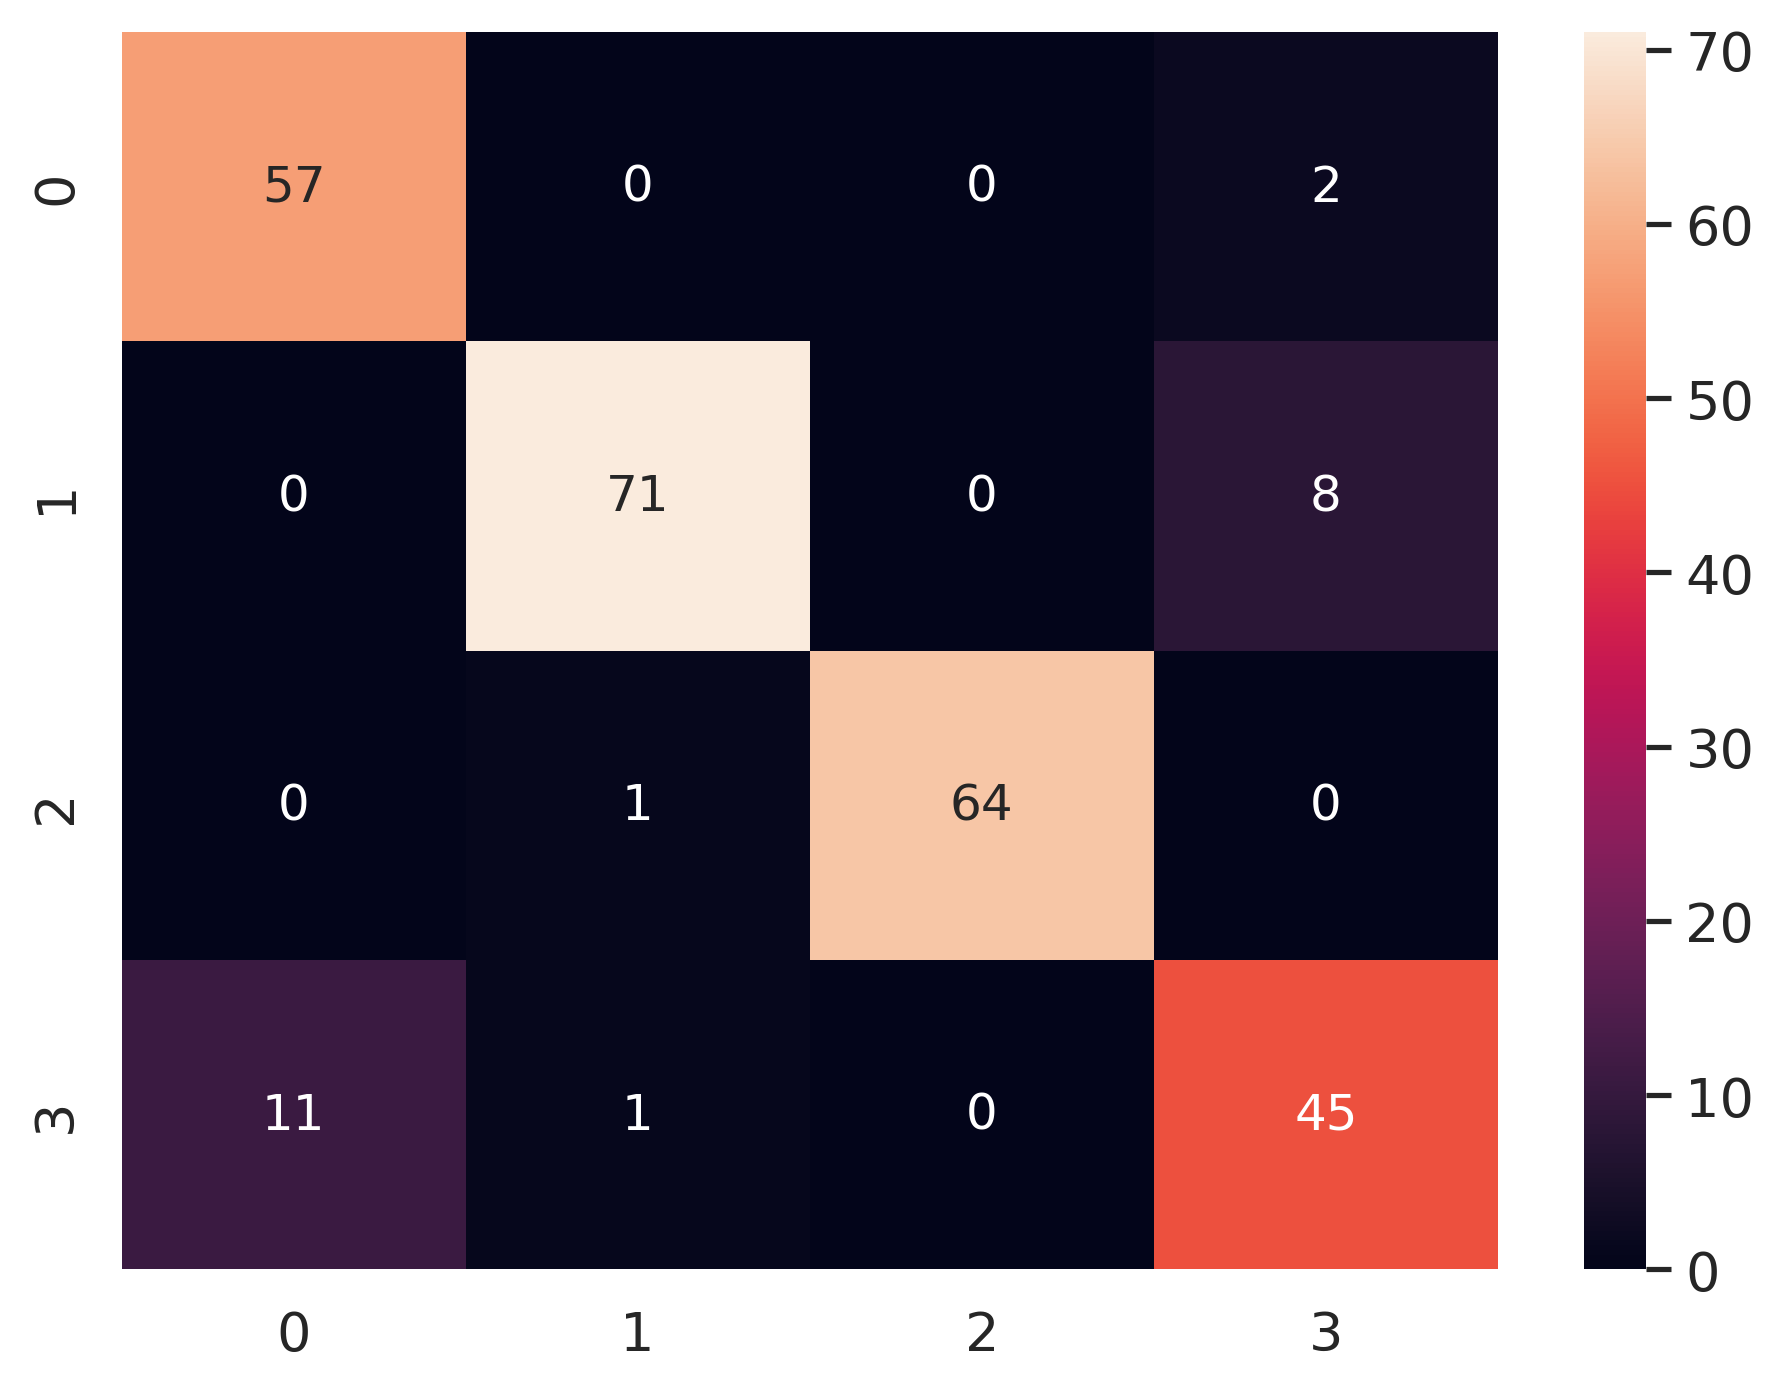

In [ ]:
knn_pred = knn.predict(X_test)
print(accuracy_score(knn_pred, y_test)*100)
print(classification_report(knn_pred, y_test))
sns.heatmap(confusion_matrix(knn_pred, y_test), annot = True)
plt.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

96.15384615384616
              precision    recall  f1-score   support

       green       0.94      0.97      0.96        66
      orange       0.97      0.99      0.98        72
         red       1.00      0.98      0.99        65
      yellow       0.93      0.89      0.91        57

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260



[]

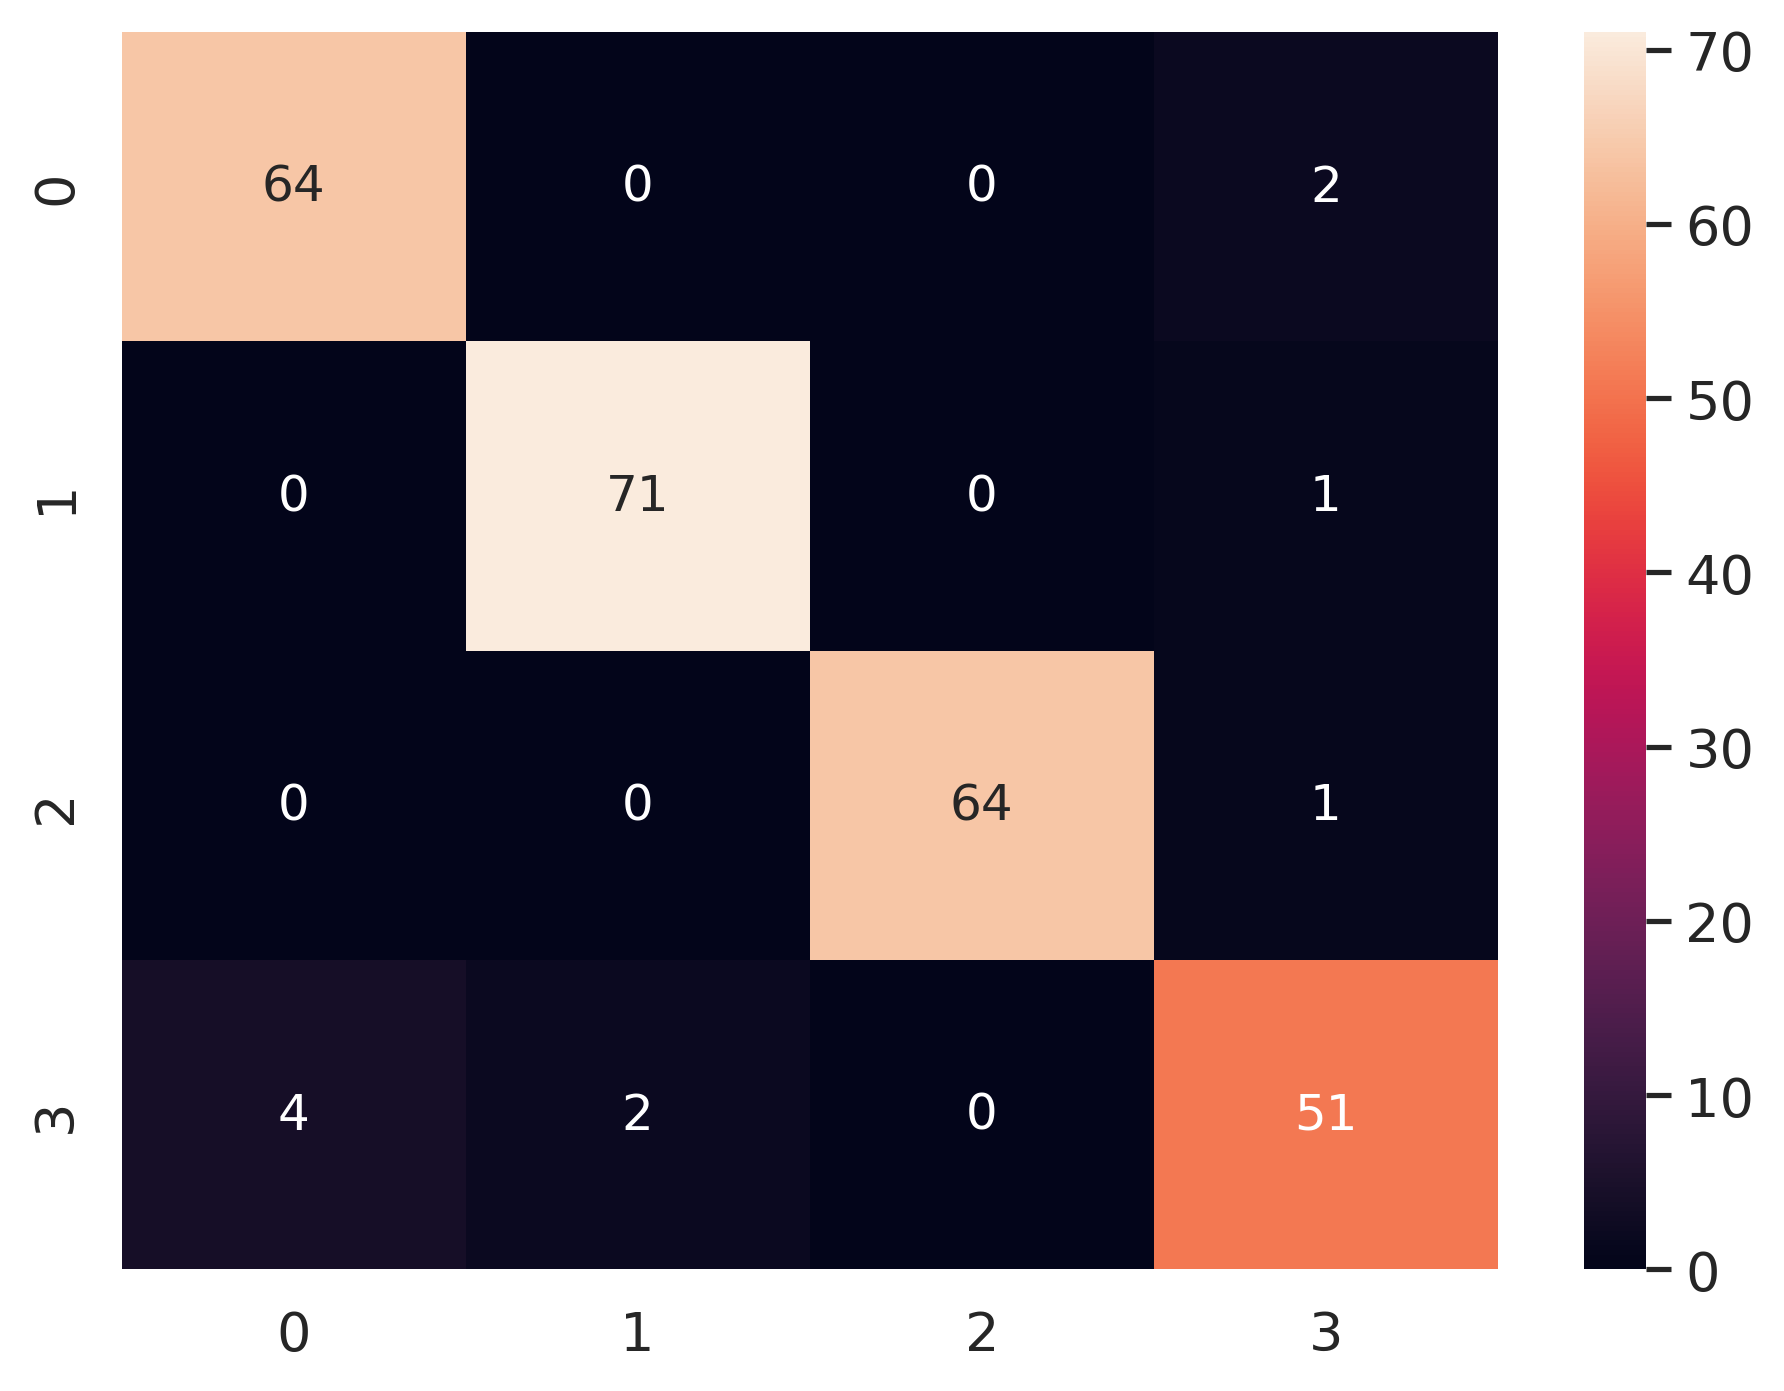

In [ ]:
rf_pred = rf.predict(X_test)
print(accuracy_score(rf_pred, y_test)*100)
print(classification_report(rf_pred, y_test))
sns.heatmap(confusion_matrix(rf_pred, y_test), annot = True)
plt.plot()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

94.61538461538461
              precision    recall  f1-score   support

       green       0.93      0.93      0.93        68
      orange       0.90      0.99      0.94        67
         red       1.00      1.00      1.00        64
      yellow       0.96      0.87      0.91        61

    accuracy                           0.95       260
   macro avg       0.95      0.95      0.95       260
weighted avg       0.95      0.95      0.95       260



[]

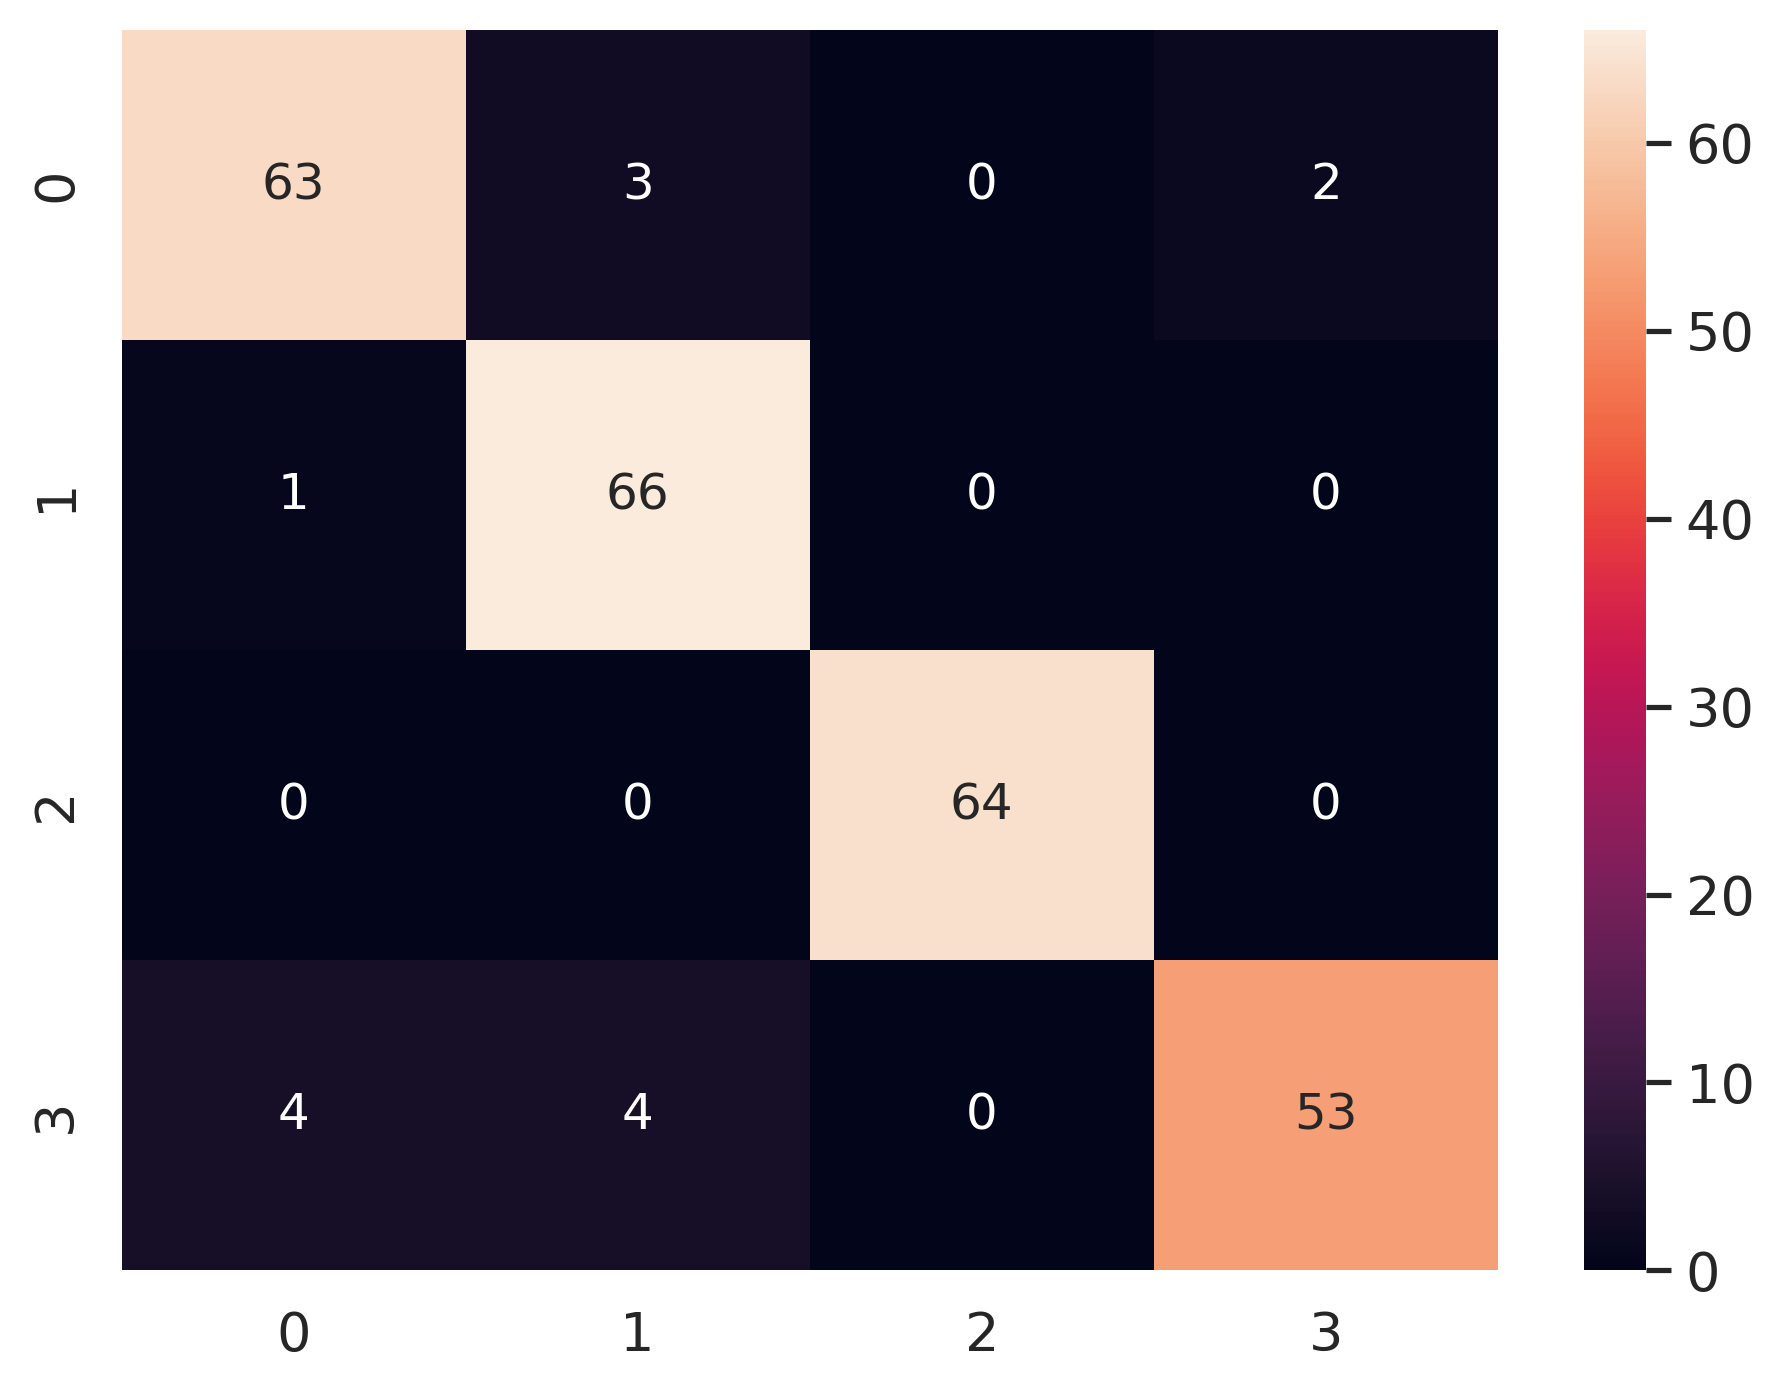

In [ ]:
gb_pred = gb.predict(X_test)
print(accuracy_score(gb_pred, y_test)*100)
print(classification_report(gb_pred, y_test))
sns.heatmap(confusion_matrix(gb_pred, y_test), annot = True)
plt.plot()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE



In [ ]:
data = pd.read_csv('earthquake_data.csv')
features = ["magnitude", "depth", "cdi", "mmi", "sig"]
target = "alert"

data = data[features + [target]]

data.dropna(inplace=True)

X = data[features]
y = data[target]

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)


In [ ]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(y_train.shape[1], activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=70,
                    batch_size=32)



Epoch 1/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3743 - loss: 1.3079 - val_accuracy: 0.6654 - val_loss: 1.0879
Epoch 2/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 1.0652 - val_accuracy: 0.6923 - val_loss: 0.8347
Epoch 3/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6627 - loss: 0.8454 - val_accuracy: 0.7231 - val_loss: 0.6717
Epoch 4/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7083 - loss: 0.7069 - val_accuracy: 0.8000 - val_loss: 0.5829
Epoch 5/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.6306 - val_accuracy: 0.7923 - val_loss: 0.5194
Epoch 6/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7801 - loss: 0.5772 - val_accuracy: 0.8192 - val_loss: 0.4630
Epoch 7/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.5261 - val_accuracy: 0.8077 - val_loss: 0.4337
Epoch 8/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7847 - loss: 0.5107 - val_accuracy: 0.8115 - val_loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9378 - loss: 0.2158 
Test Accuracy: 94.23%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        68
           1       0.95      0.99      0.97        73
           2       1.00      1.00      1.00        64
           3       0.83      0.91      0.87        55

    accuracy                           0.94       260
   macro avg       0.94      0.94      0.94       260
weighted avg       0.95      0.94      0.94       260



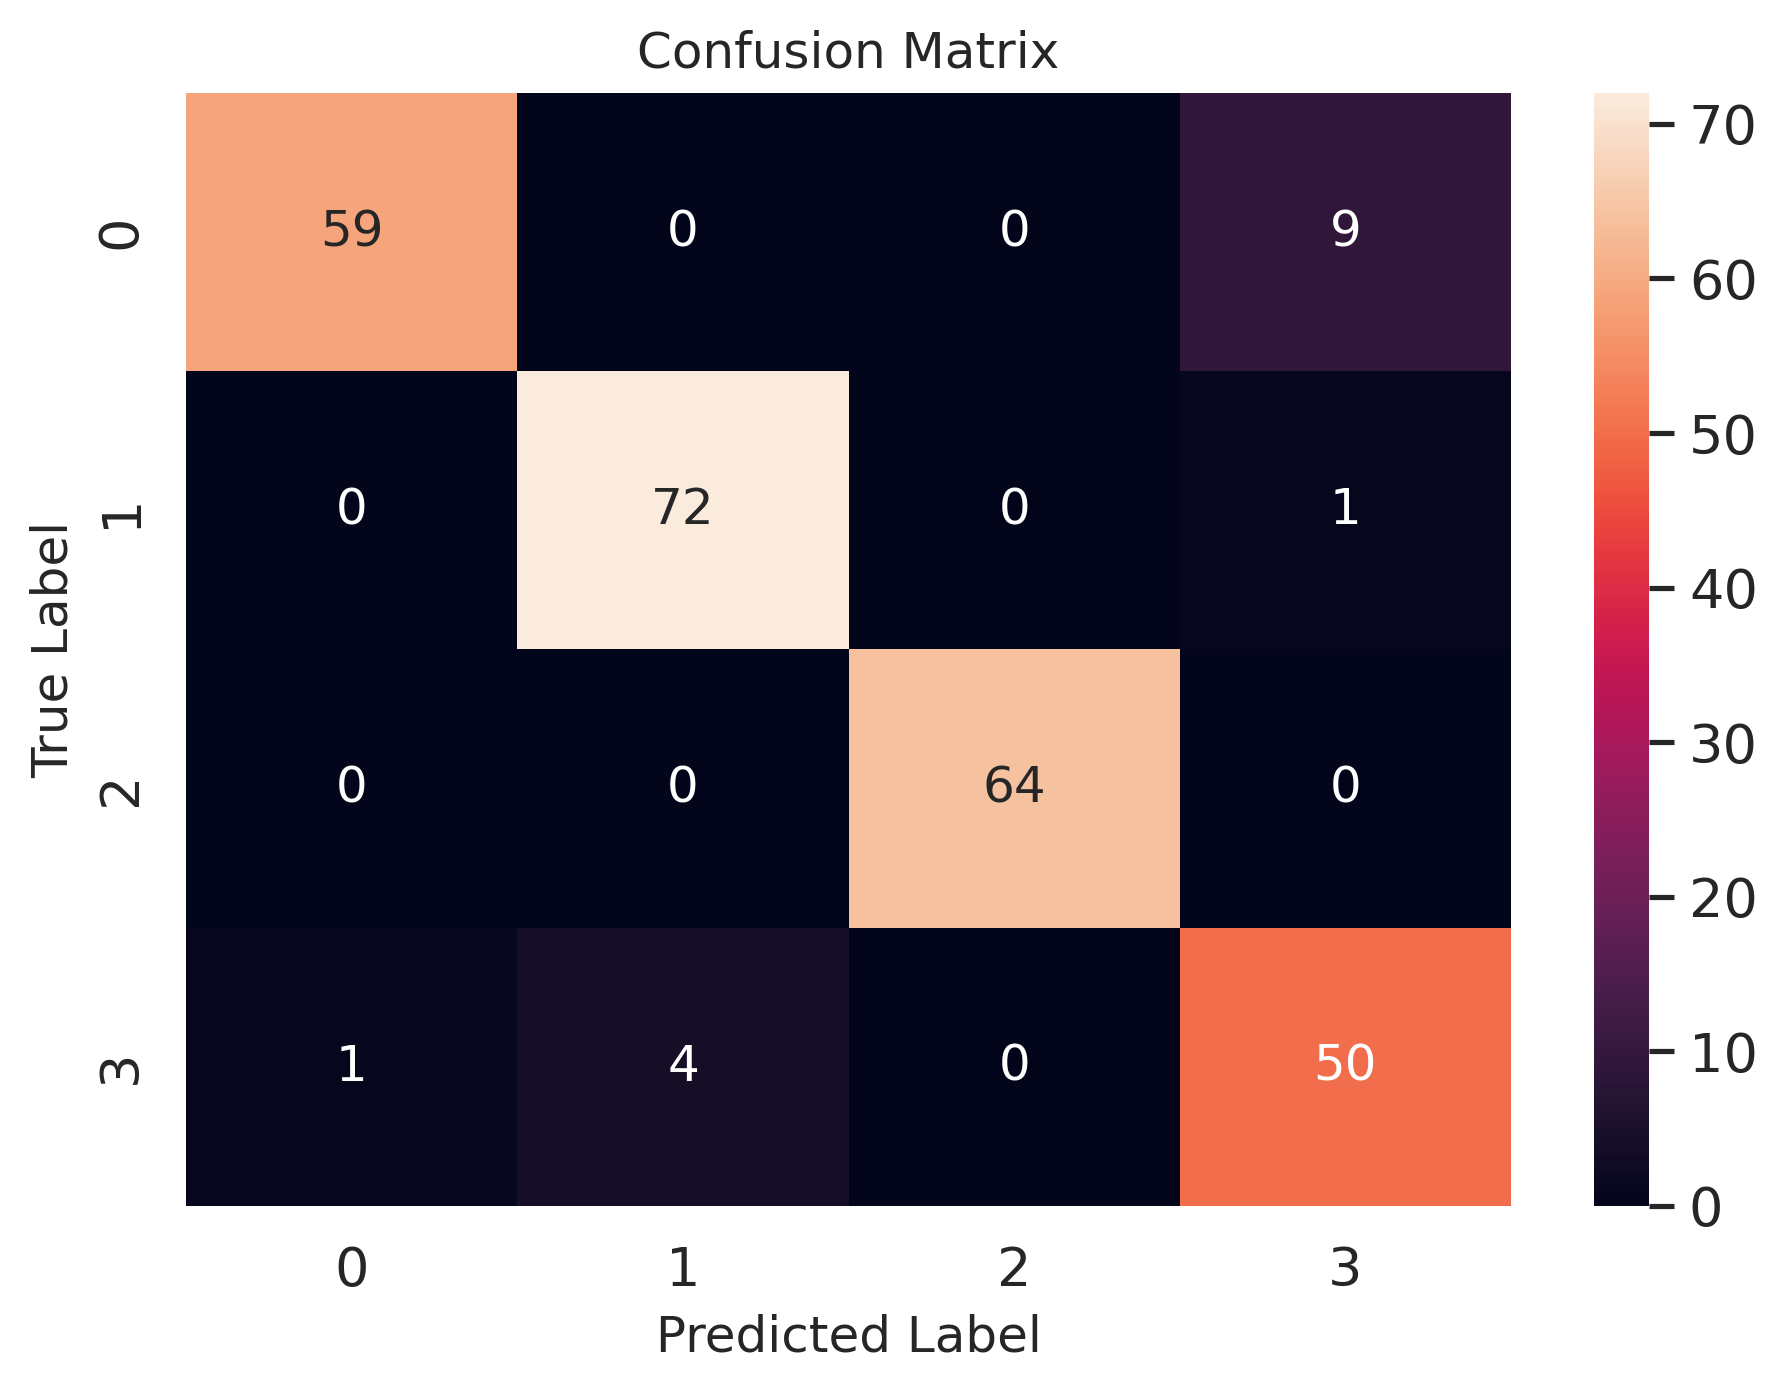

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test.values, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes))

# Display confusion matrix using seaborn's heatmap
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
